In [20]:
# packages that will be used
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# this database were provided by a study mate, and at the very end I'll compare my notebook with his notebook 
# the database are related to a credit company and we'll estimate customer behavior
df = pd.read_csv('study database.csv')
display(df)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,high school,0,1,0,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,high school,0,1,0,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,university,0,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,high school,0,1,0,0,0


In [9]:
colummns_id = df.columns.tolist()
colummns_id[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [10]:
colummns_id[-5:]

['graduate school', 'high school', 'none', 'others', 'university']

In [11]:
# identifying the columns and removing those that do not fit the criteria proposed by my studymate
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [12]:
example_list_comp = [item for item in range(5)]
example_list_comp

[0, 1, 2, 3, 4]

In [9]:
colummns_id = [item for item in features_response if item not in items_to_remove]
colummns_id

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [13]:
#  creating our correlation plot
corr = df[colummns_id].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000


<AxesSubplot:>

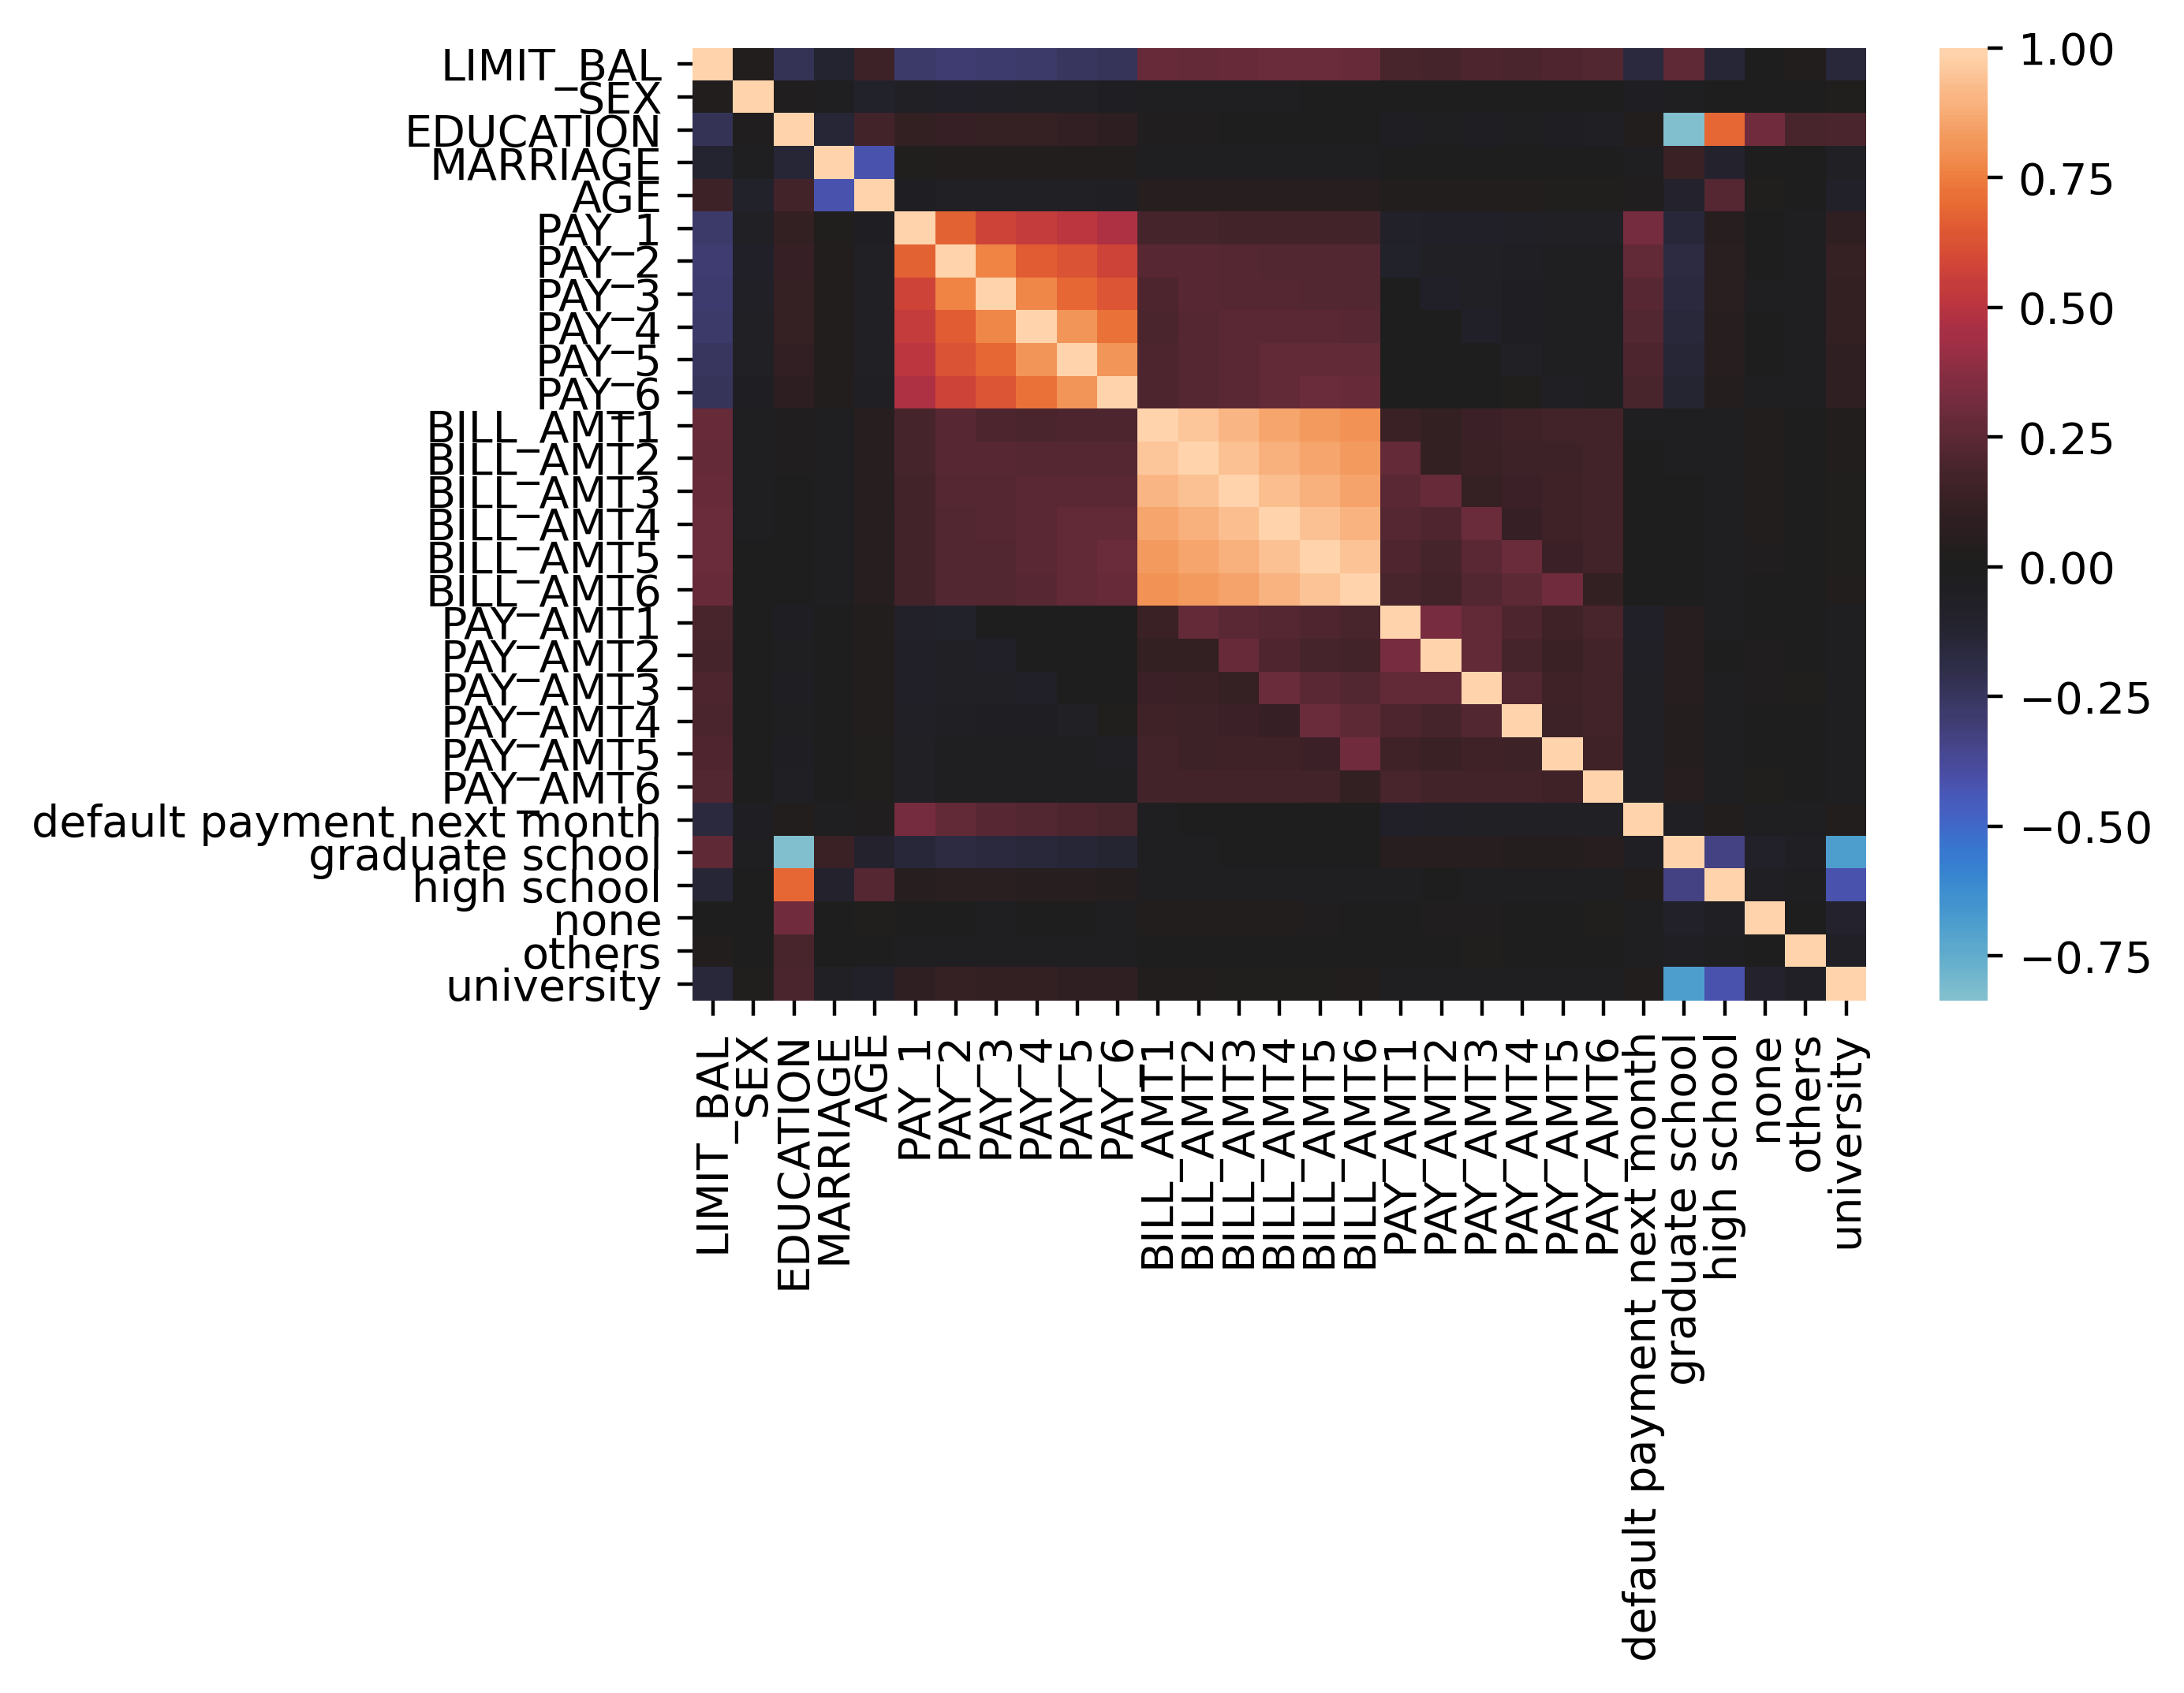

In [14]:
#  heatmap makes a great visualization of the correlation matrix
mpl.rcParams['figure.dpi'] = 400 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [15]:
# random seed generation for sample
n_points = 500
np.random.seed(seed=2)
X = np.random.uniform(low=0.0, high=10.0, size=(n_points,))
slope = 0.25
noise = 0.2
y=[]
y.append( slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( -slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.sin(X/(2)*np.pi) + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )

In [18]:
np.corrcoef(X, y[3])

array([[1.        , 0.01900706],
       [0.01900706, 1.        ]])

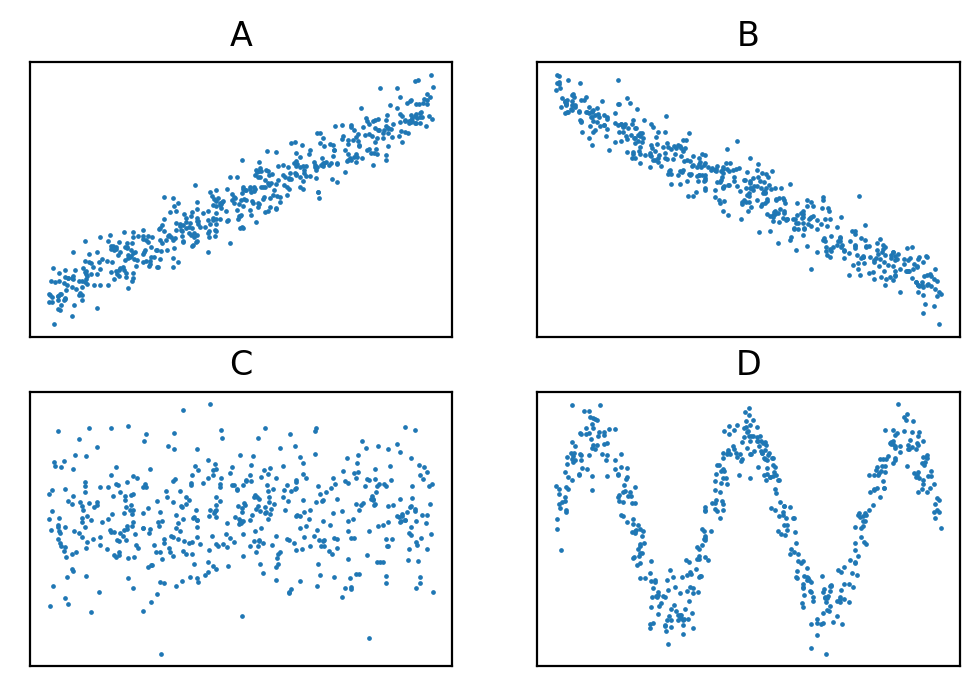

In [21]:
mpl.rcParams['figure.dpi'] = 200
fig_h, ax_h = plt.subplots(2,2)
counter = 0
correlations = []
titles = ['A', 'B', 'C', 'D']
for axis in ax_h.flatten():
    axis.scatter(X,y[counter],s=0.5)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(titles[counter])
#     axis.set_title( r'$\rho = ${:0.2f}'.format(np.corrcoef(X, y[counter])[0,1]))
    correlations.append(np.corrcoef(X, y[counter])[0,1])
    counter+=1

In [22]:
# A and B, the actual Pearson correlations of these datasets are 0.96 and -0.97
# C, the correlation is 0.06, correlation closer to 0, maybe lack some info
# D shows the relationship between the variables

correlations

[0.96375132764979,
 -0.9659993956705688,
 0.06339625904219304,
 0.019007055545229225]

In [36]:
# visualizing the relationship between feat. and response
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [37]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


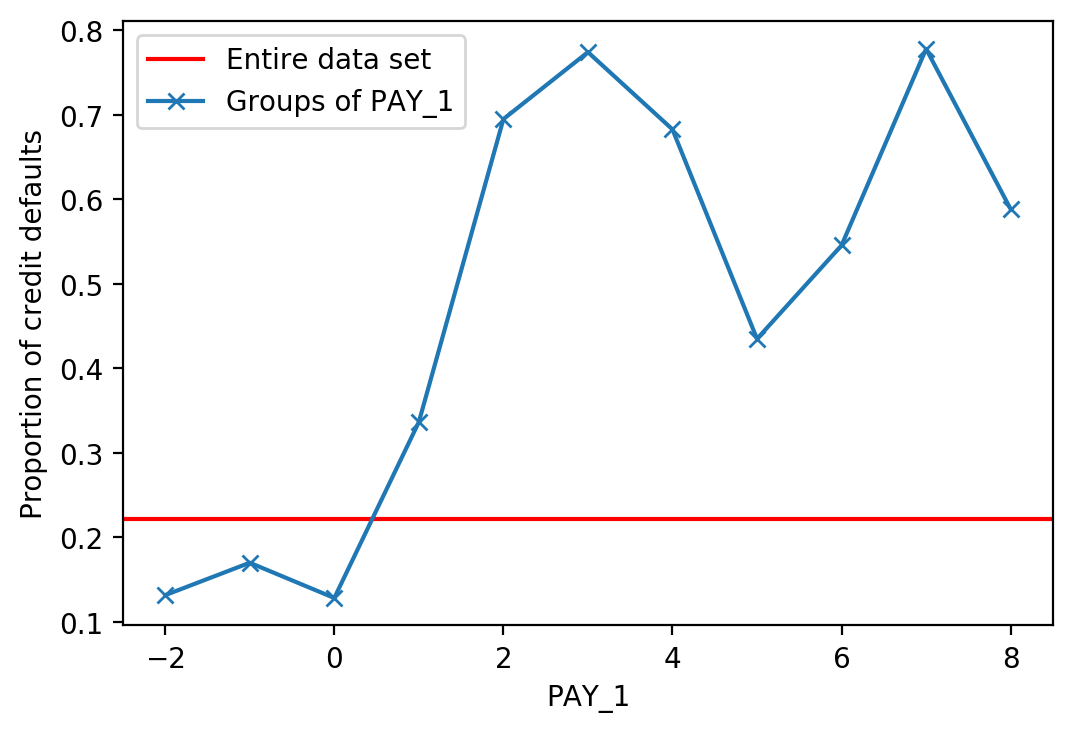

In [30]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Groups of PAY_1'])

In [31]:
# visualization of payment statuses has revealed  those who defaulted before, are in fact more likely to default again
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

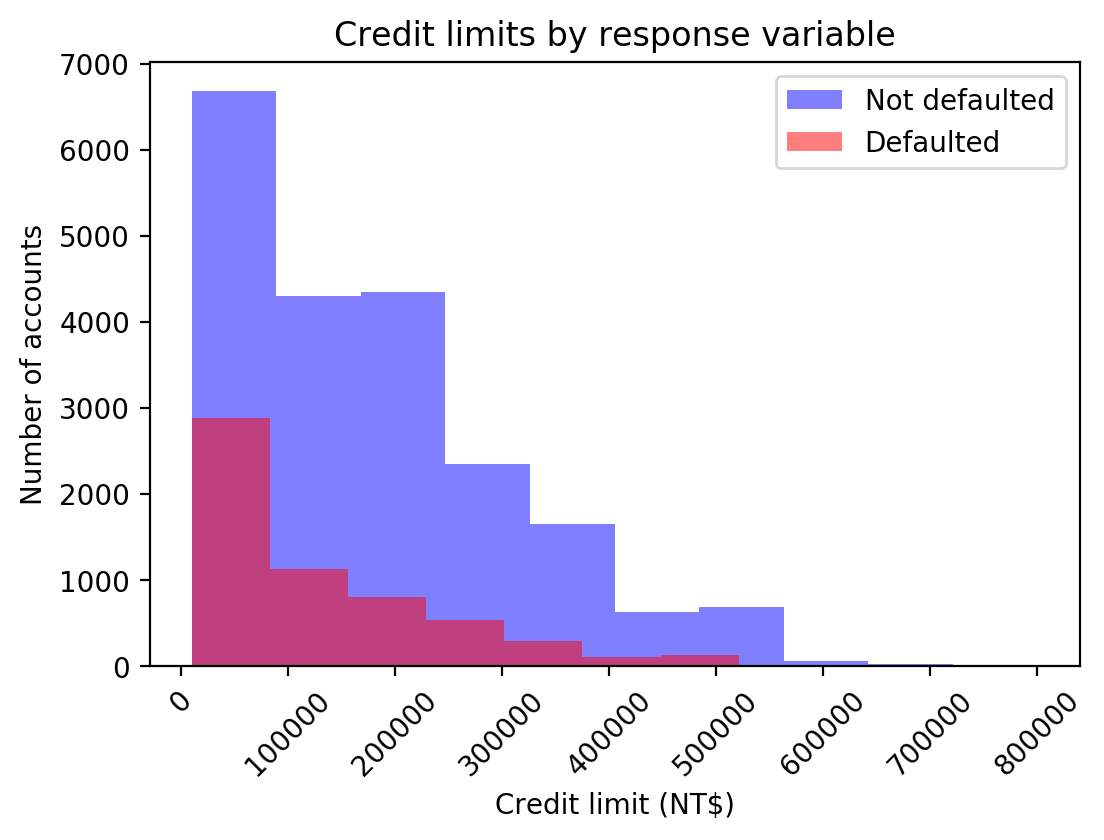

In [32]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [33]:
# this histogram isn't interpretable as it could be BUT shows how the credit limit may be a good way to distinguish between accounts that default


df['LIMIT_BAL'].max()

800000

In [34]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

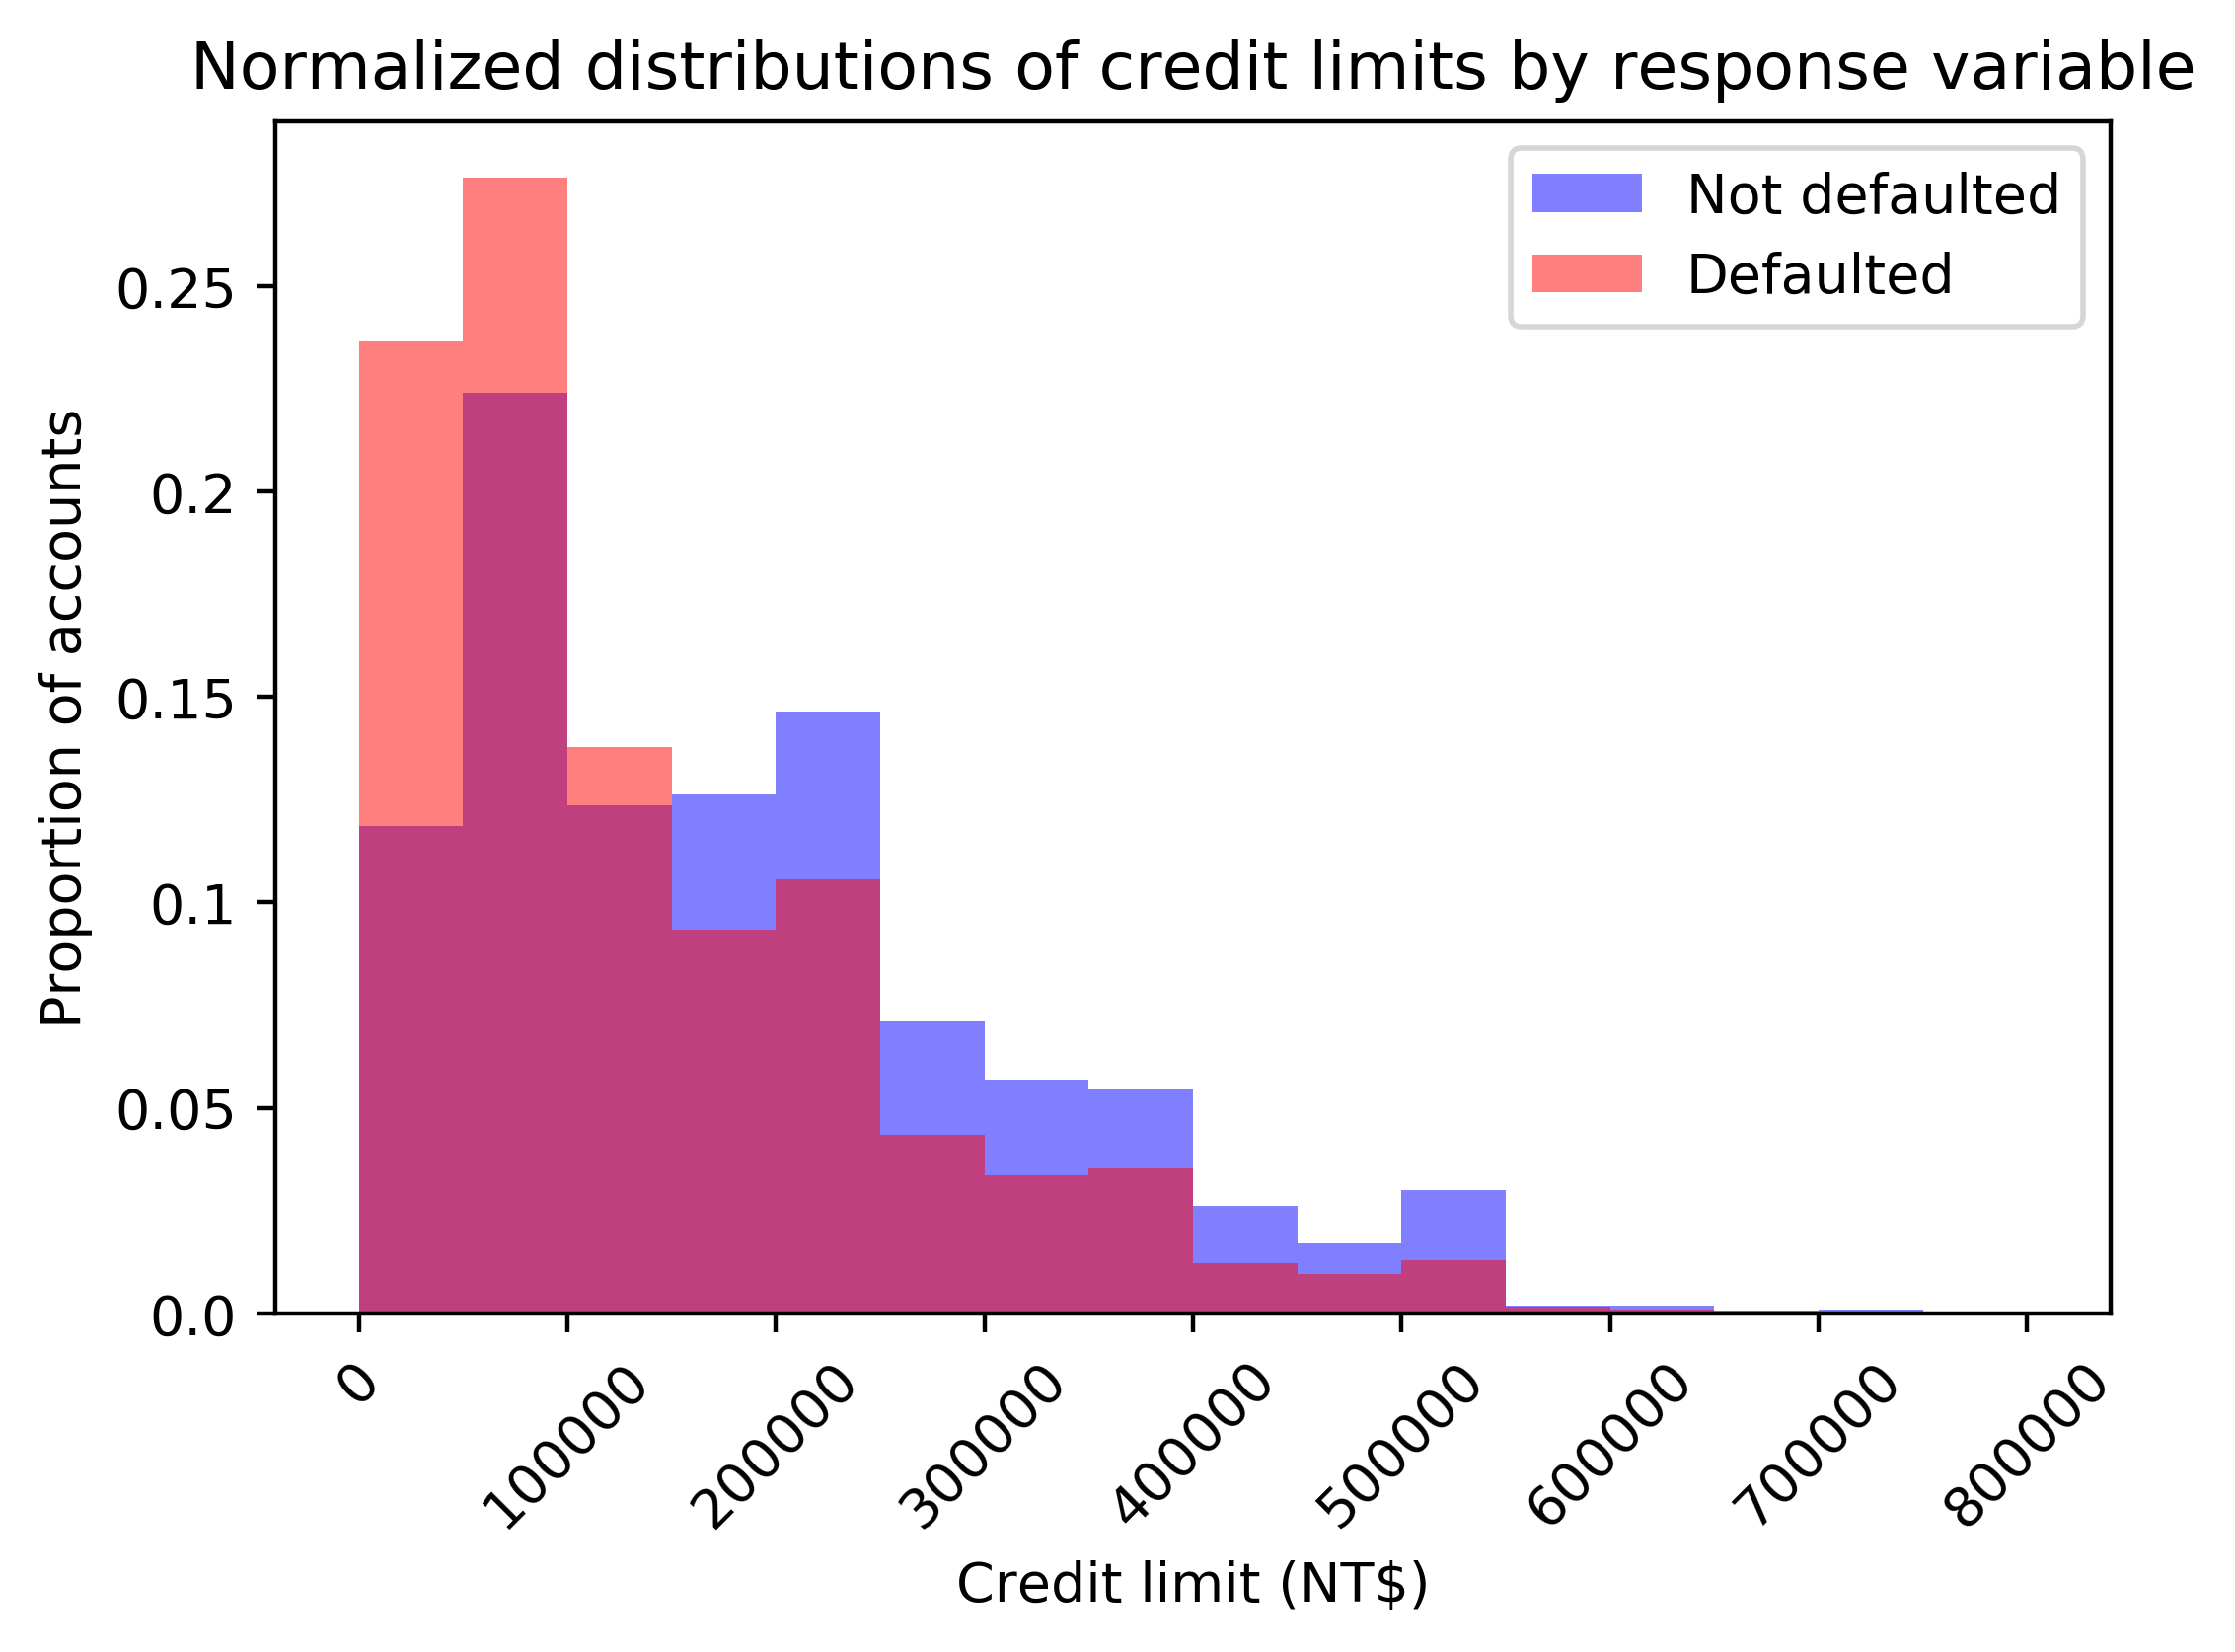

In [35]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')
# this one shows  the accounts that default tend to have a higher proportion of lower credit limits

In [36]:
# testing with sigmoid function
np.mean([1, 2, 3, 4, 5])

3.0

In [37]:
def my_mean(input_argument):
    output = sum(input_argument)/len(input_argument)
    return(output)

In [38]:
my_mean([1, 2, 3, 4, 5])

3.0

In [39]:
my_mean(input_argument=[1, 2, 3])

2.0

In [40]:
np.exp(1)

2.718281828459045

In [41]:
np.exp(0)

1.0

In [42]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [43]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

Text(0.5, 1.0, 'Plot of $e^X$')

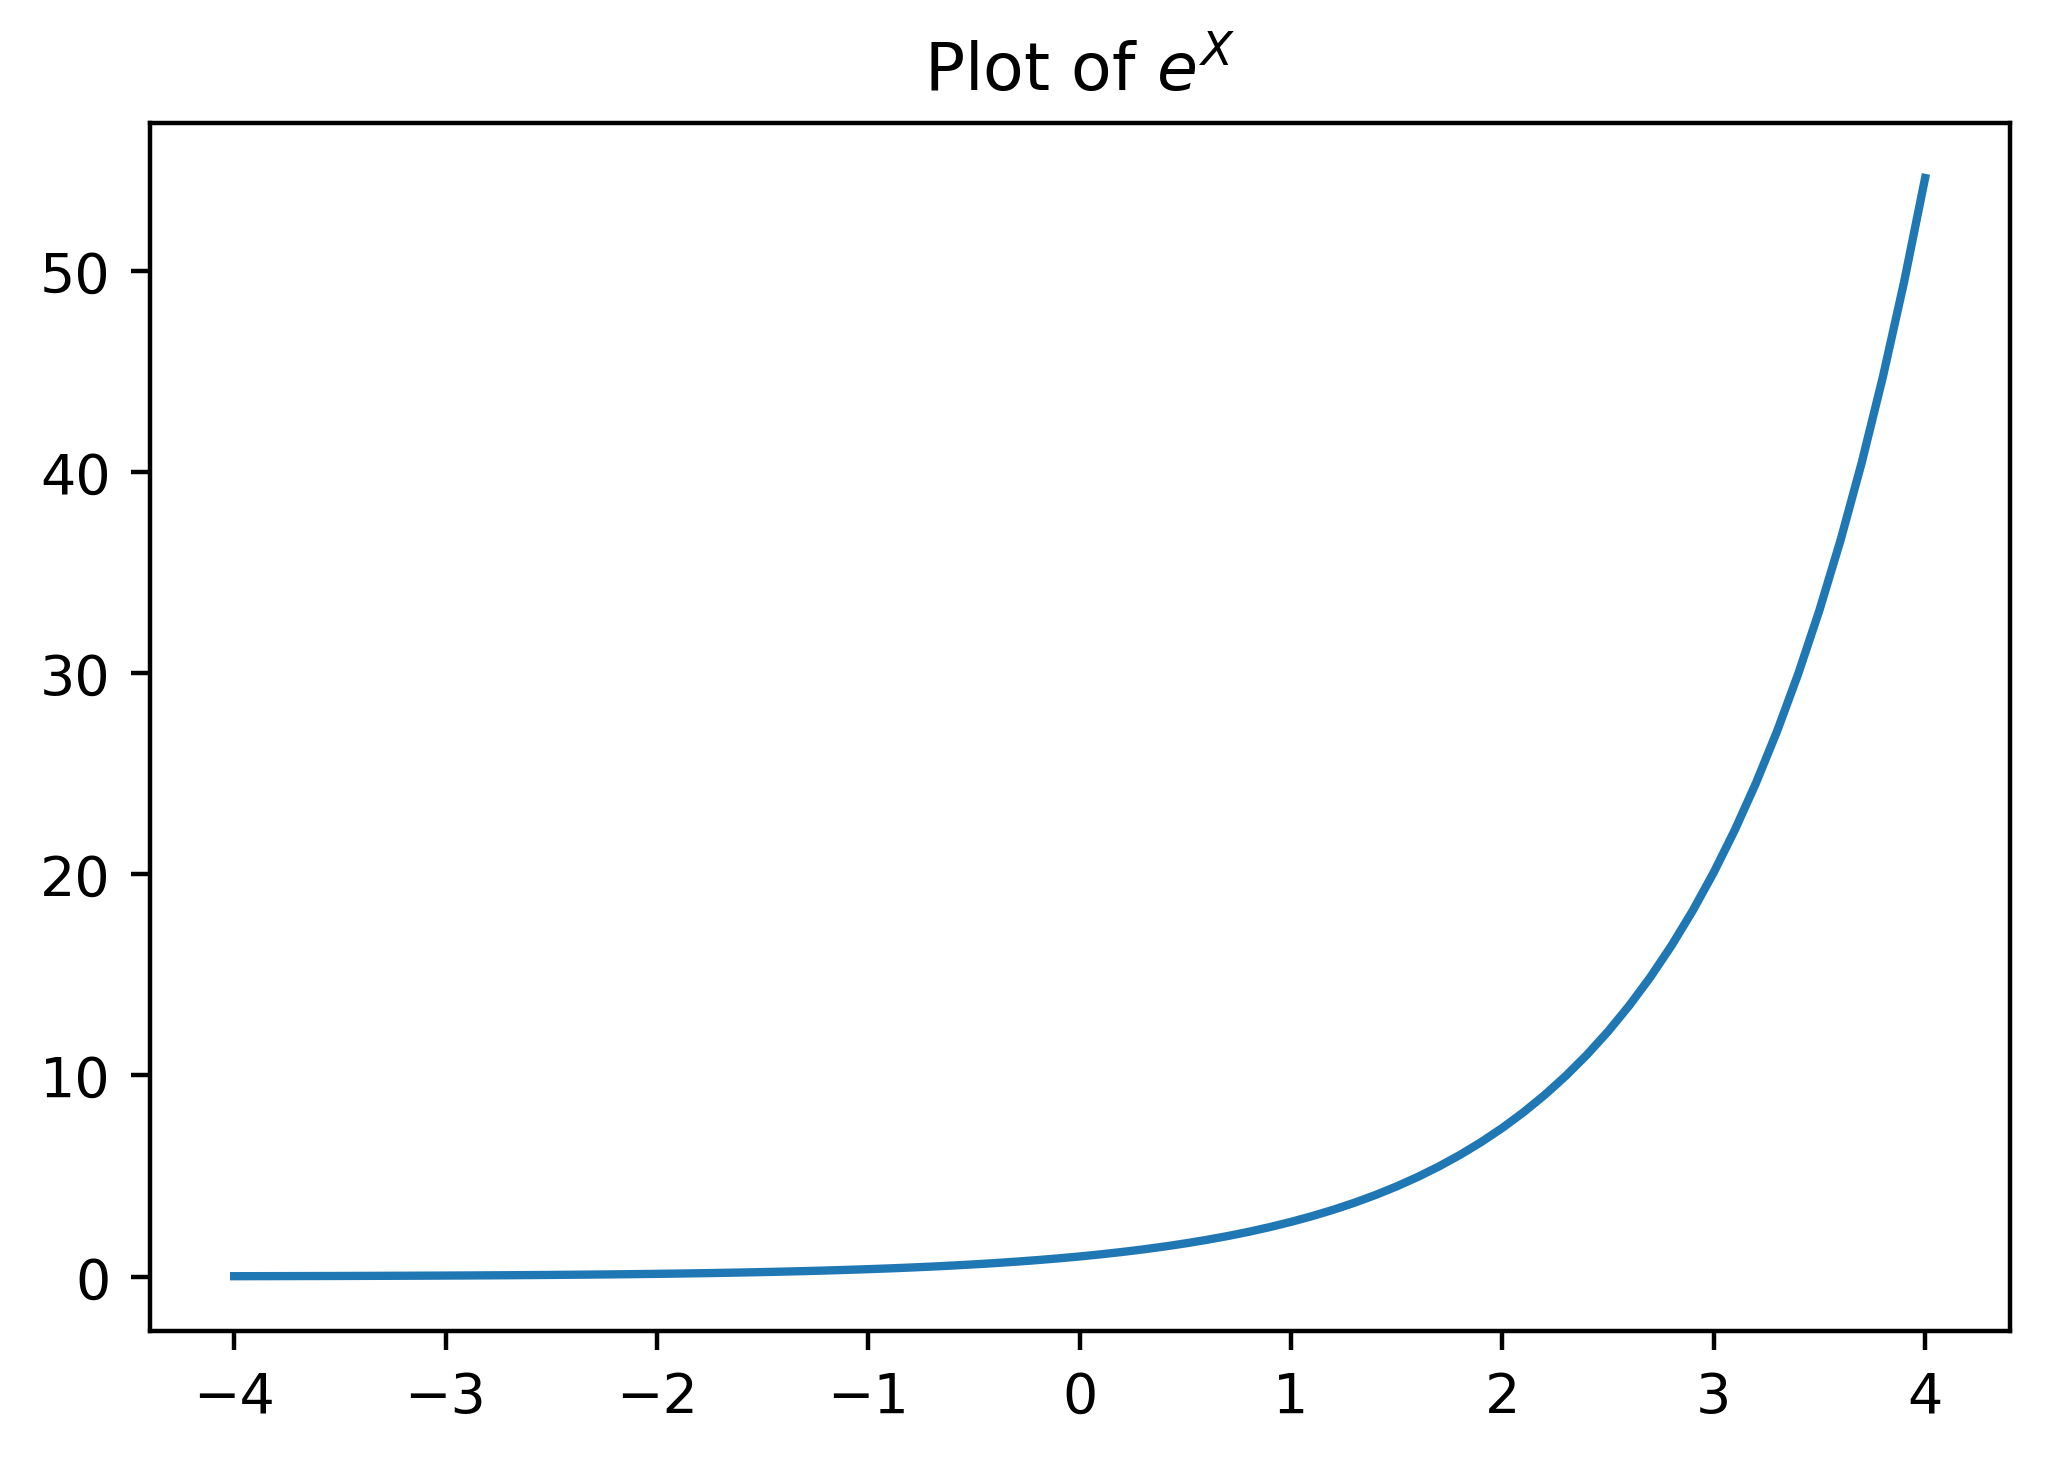

In [44]:
# plotting the sigmoide function
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')
# this shows an exponential growth

Text(0.5, 1.0, 'Plot of $e^{-X}$')

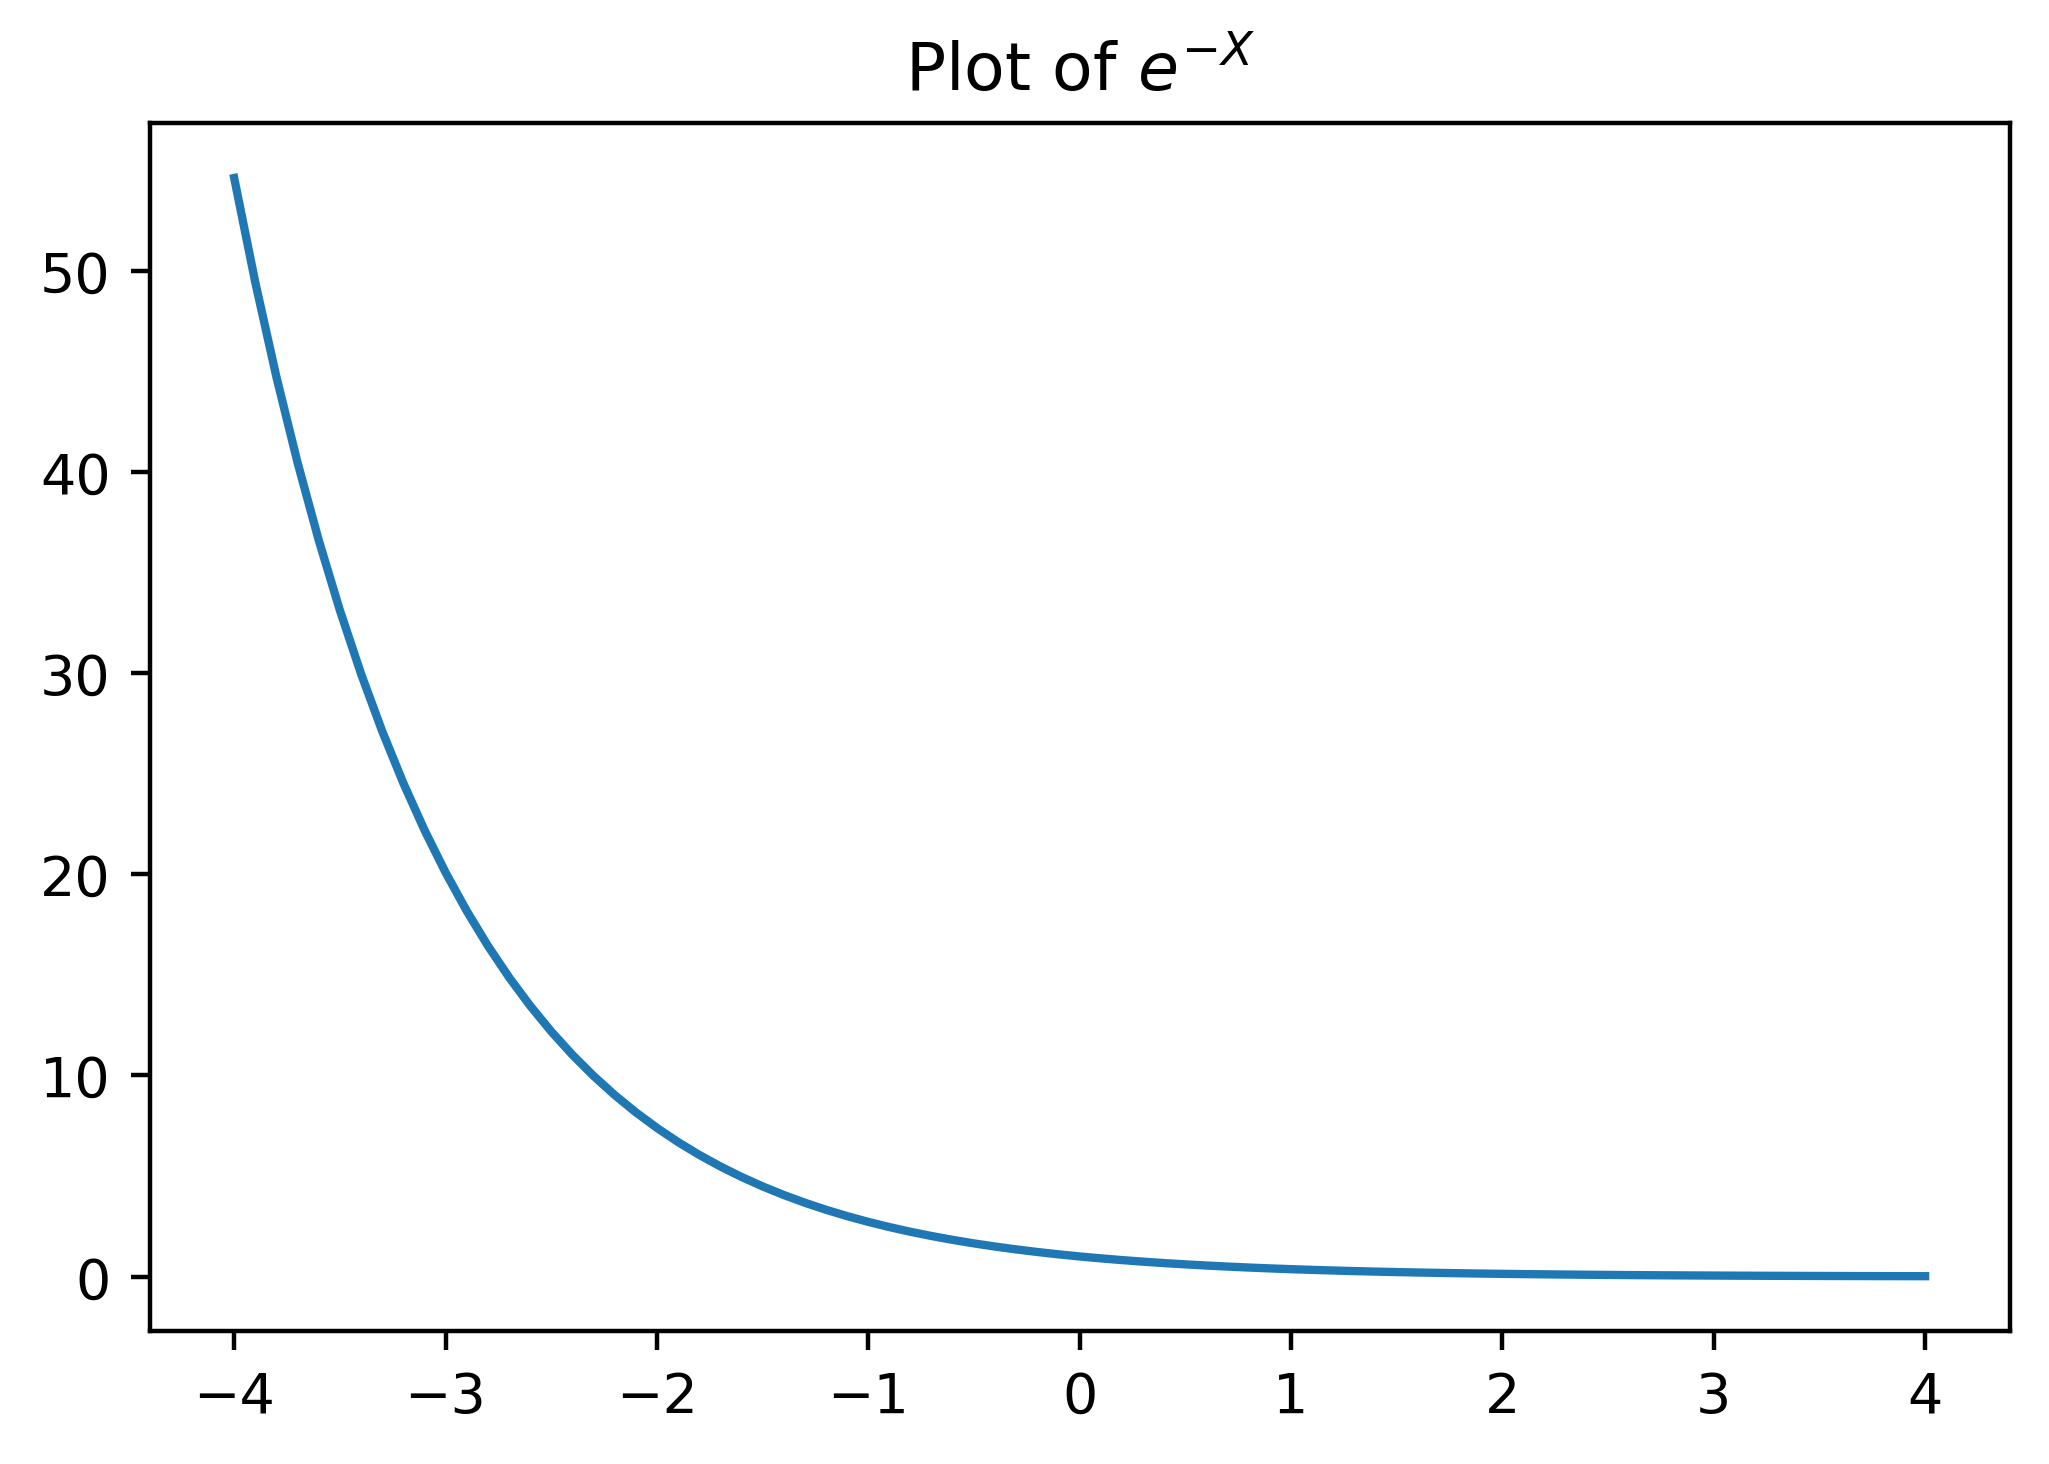

In [45]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [46]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

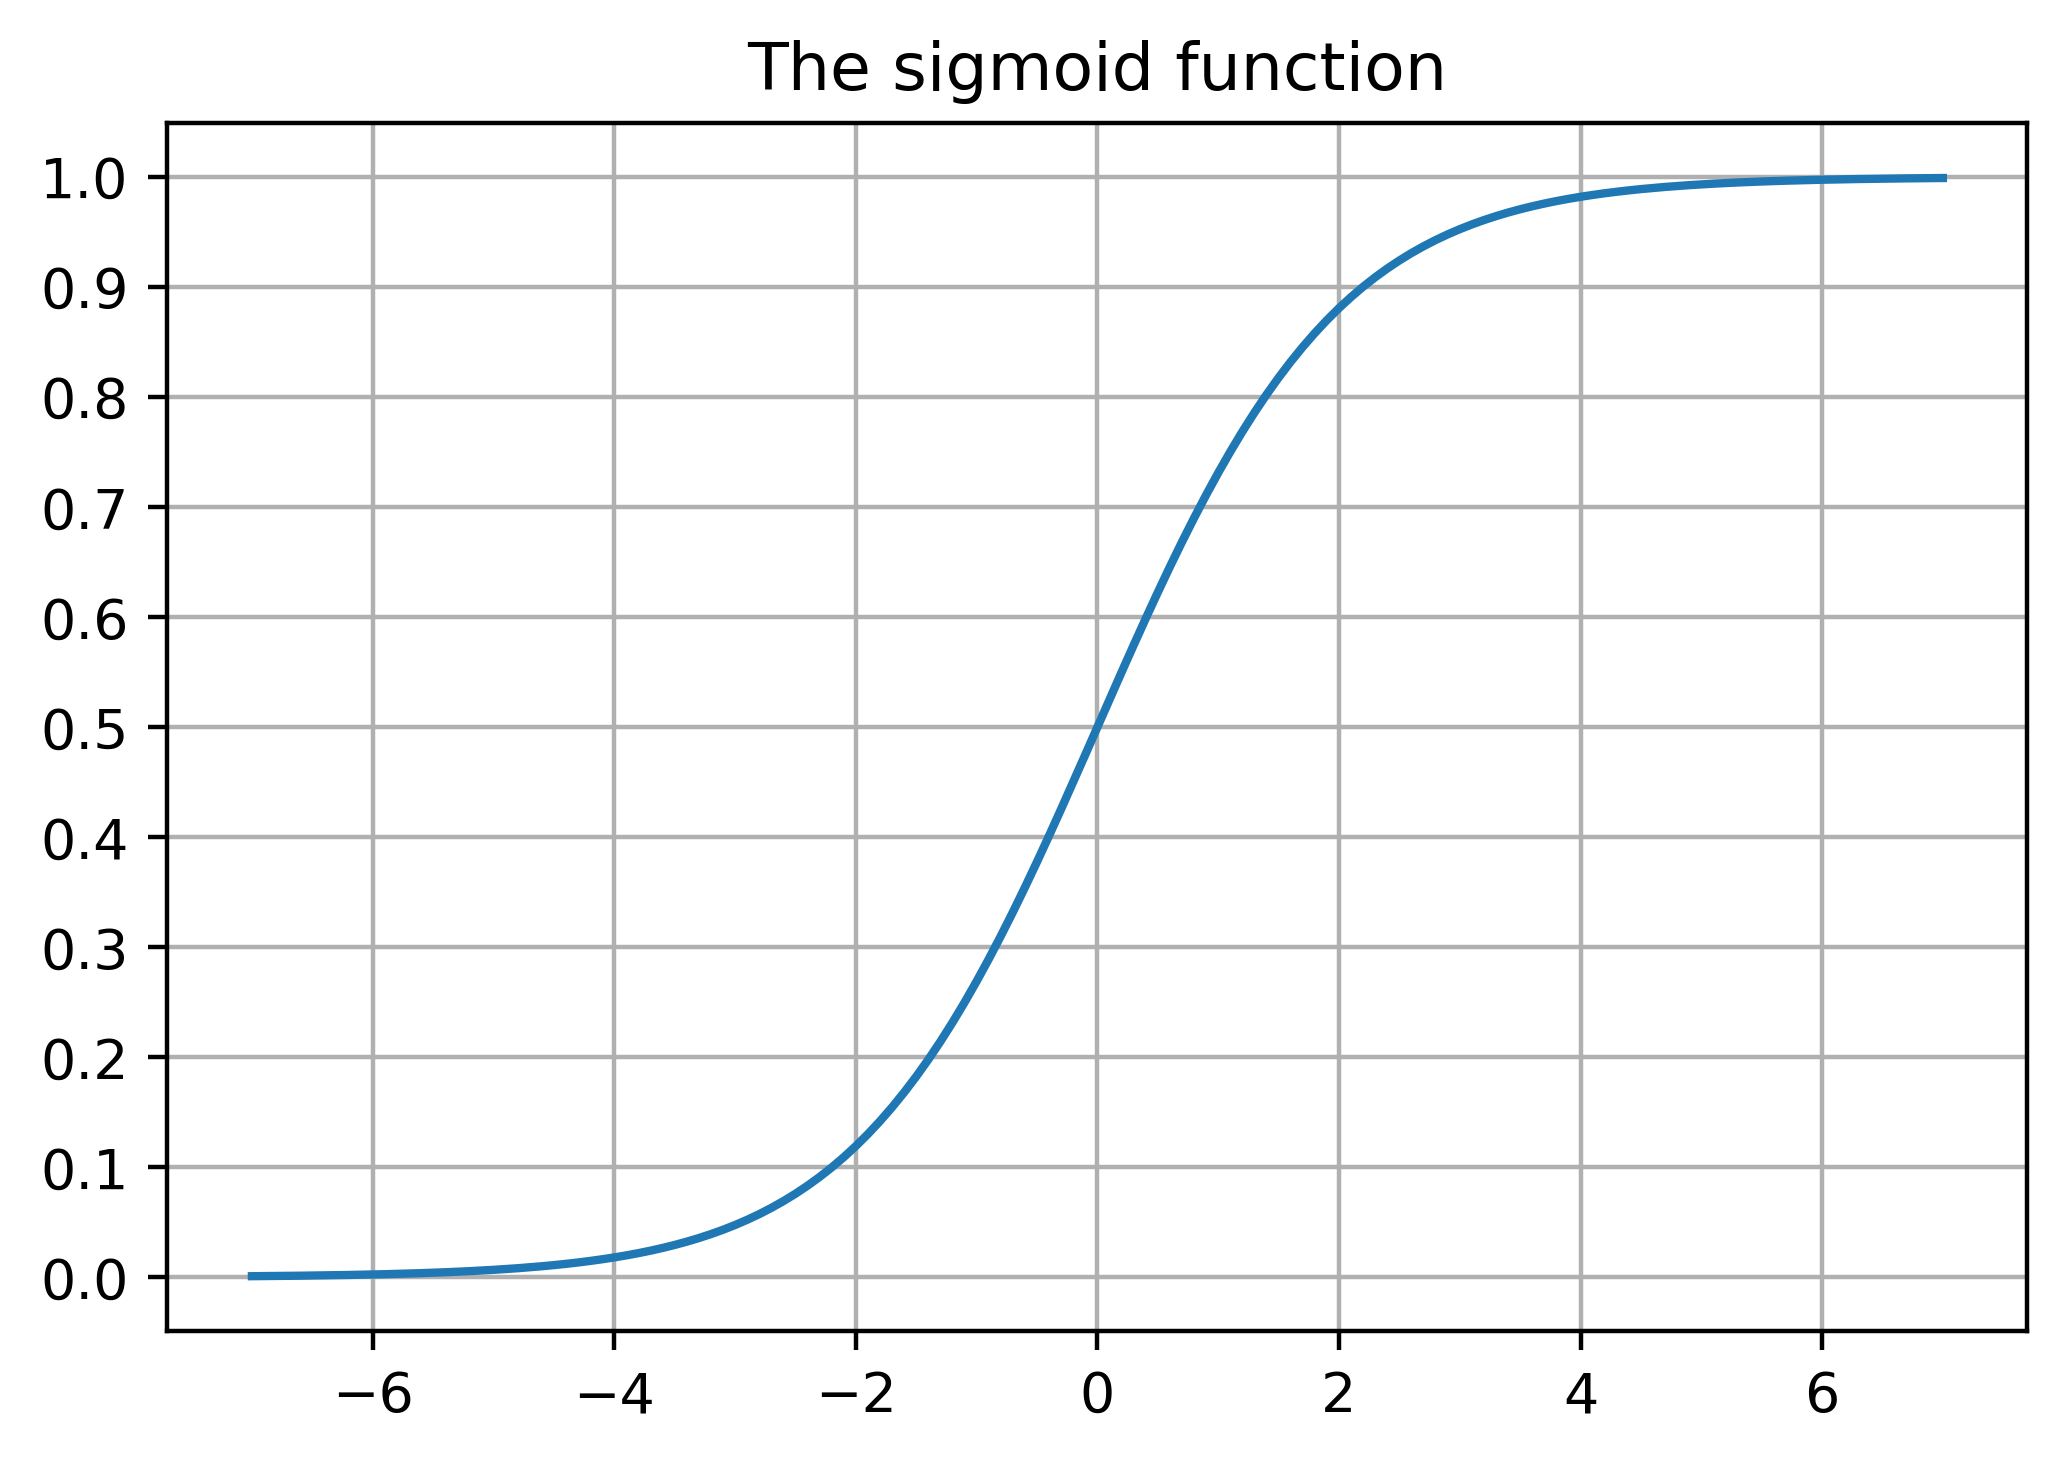

In [47]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')


In [49]:
example_global_variable = 1

In [50]:
def example_function():
    output = example_global_variable + 1
    return(output)

In [51]:
example_function()

2

In [52]:
# checking the features 
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [53]:
# Rates of default within groups of PAY_1 values as probabilities of default
p = group_by_pay_mean_y['default payment next month'].values
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [54]:
# 
odds_ratio = p/q
odds_ratio

array([0.15162791, 0.20482215, 0.14717742, 0.50693161, 2.27548209,
       3.42424242, 2.15      , 0.76923077, 1.2       , 3.5       ,
       1.42857143])

In [55]:
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [56]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

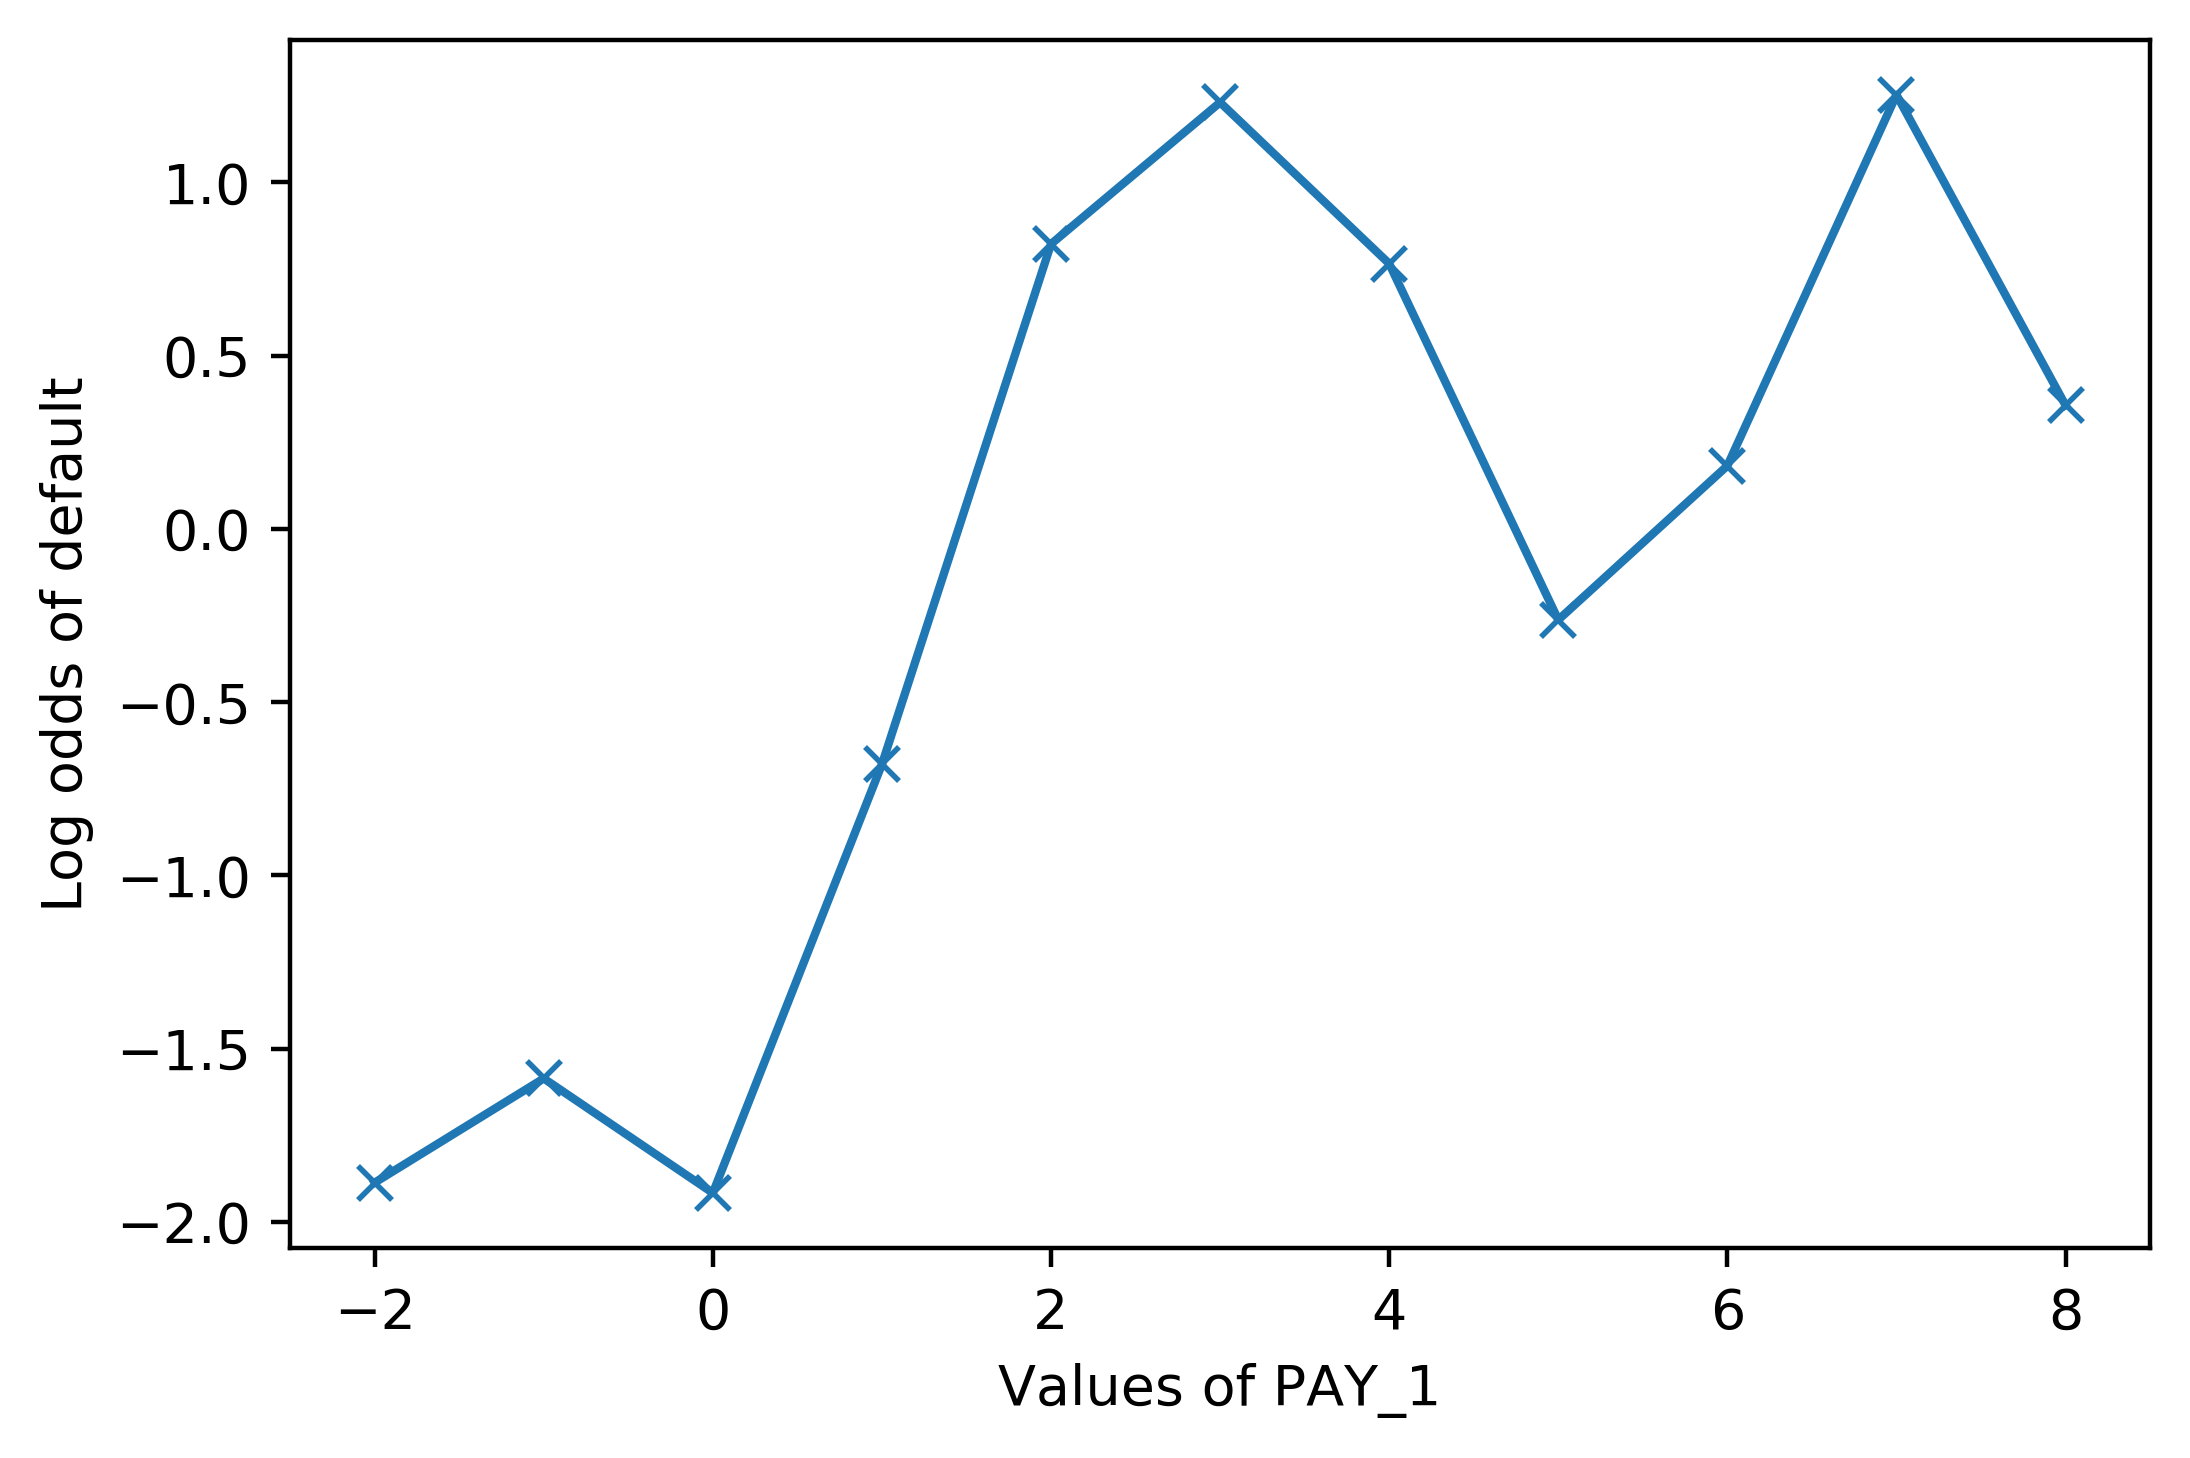

In [57]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')
# the relationship between the log odds of the response variable and the PAY_1 feature is not all that different from the relationship of the rate of default

Text(0, 0.5, '$p$')

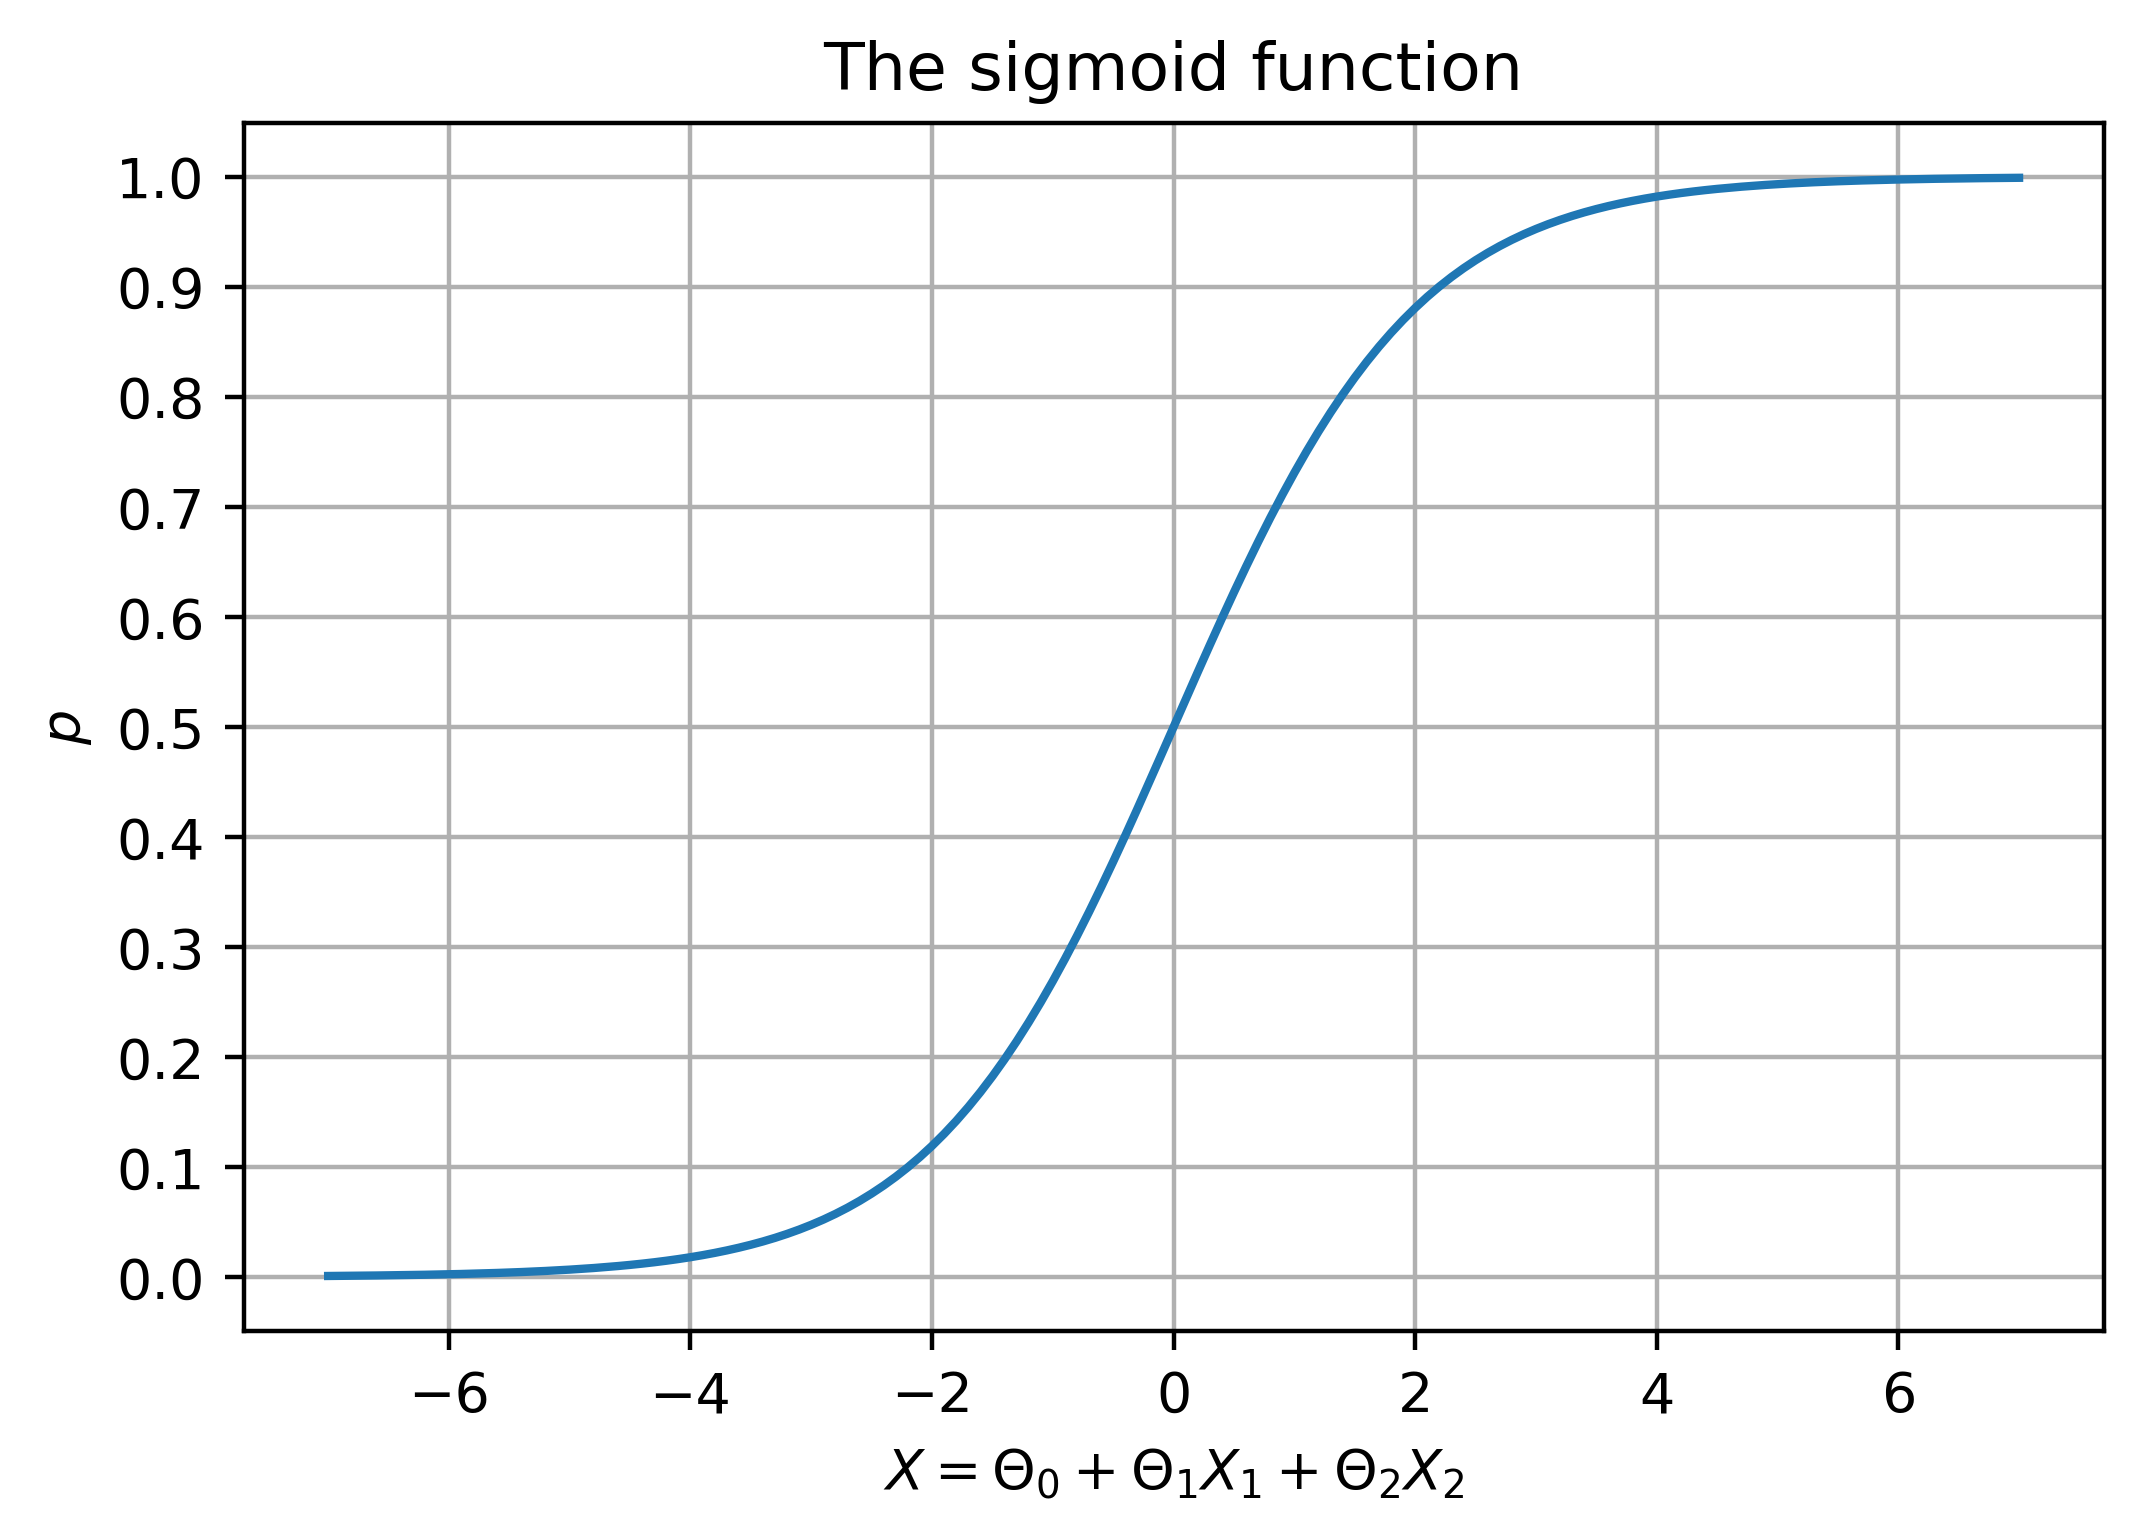

In [58]:
# predictions using the sigmoid
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')
plt.xlabel('$X = \Theta_0 + \Theta_1 X_1 + \Theta_2 X_2$')
plt.ylabel('$p$')

In [59]:
# linear decision boundary
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


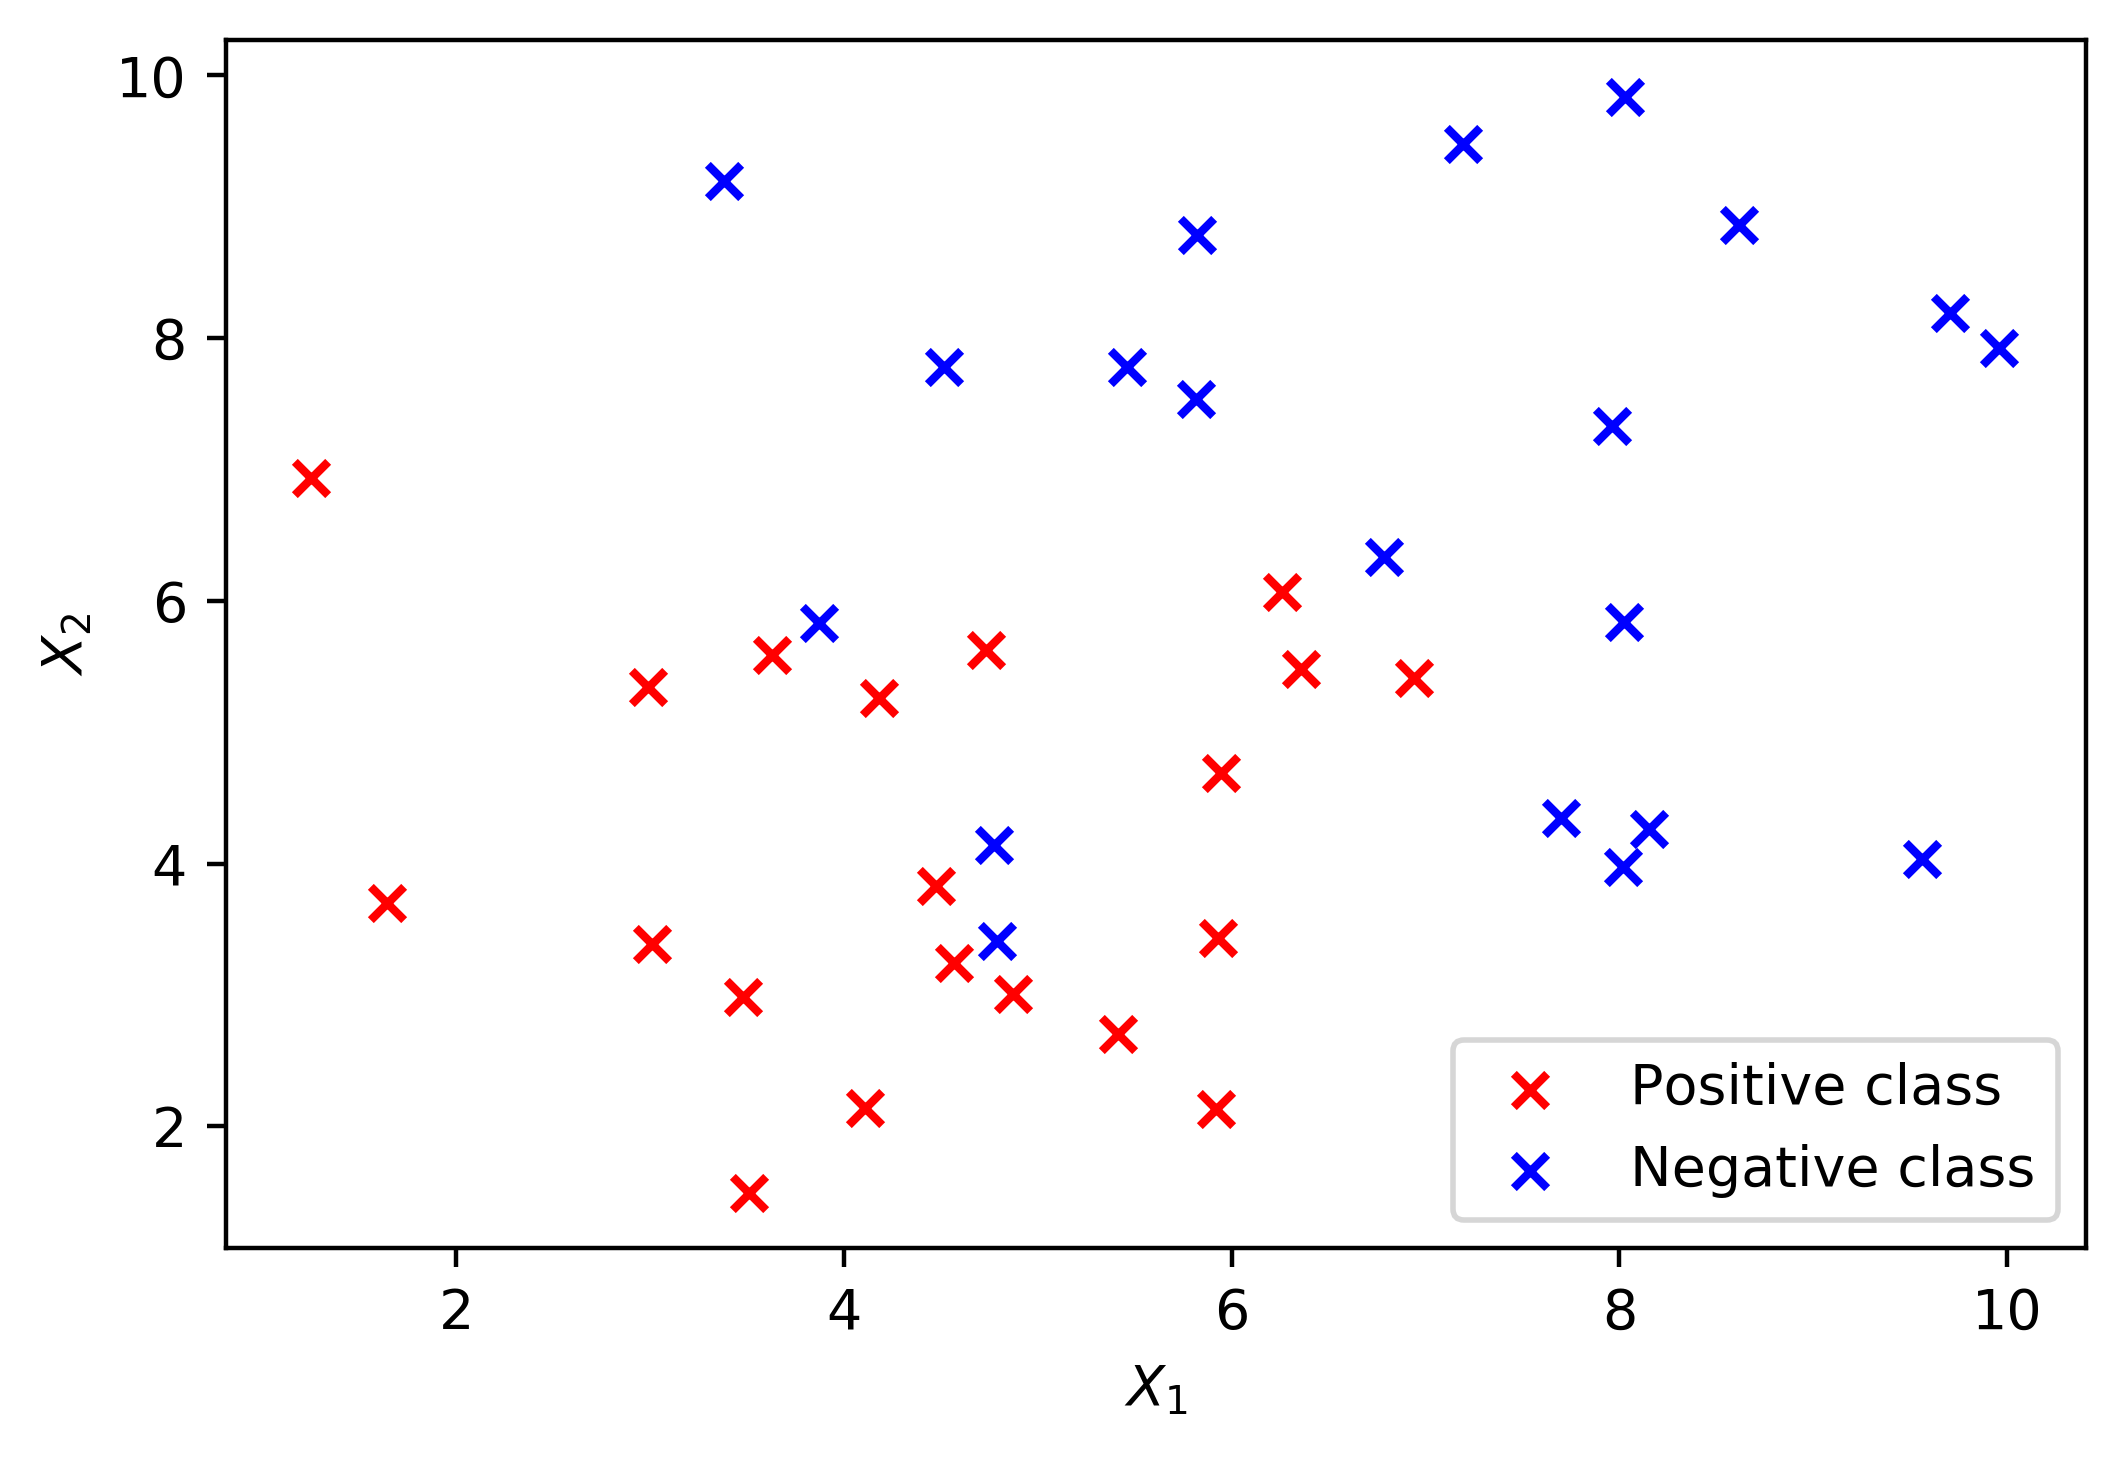

In [60]:
# generating synthetic data for a binary classification problem
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [61]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])

In [62]:
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [63]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [64]:
# I forgot to import this one
from sklearn.linear_model import LogisticRegression

In [65]:
example_lr = LogisticRegression(solver='liblinear')

In [66]:
example_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
example_lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# training the model
y_pred = example_lr.predict(X)

In [69]:
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]

In [70]:
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

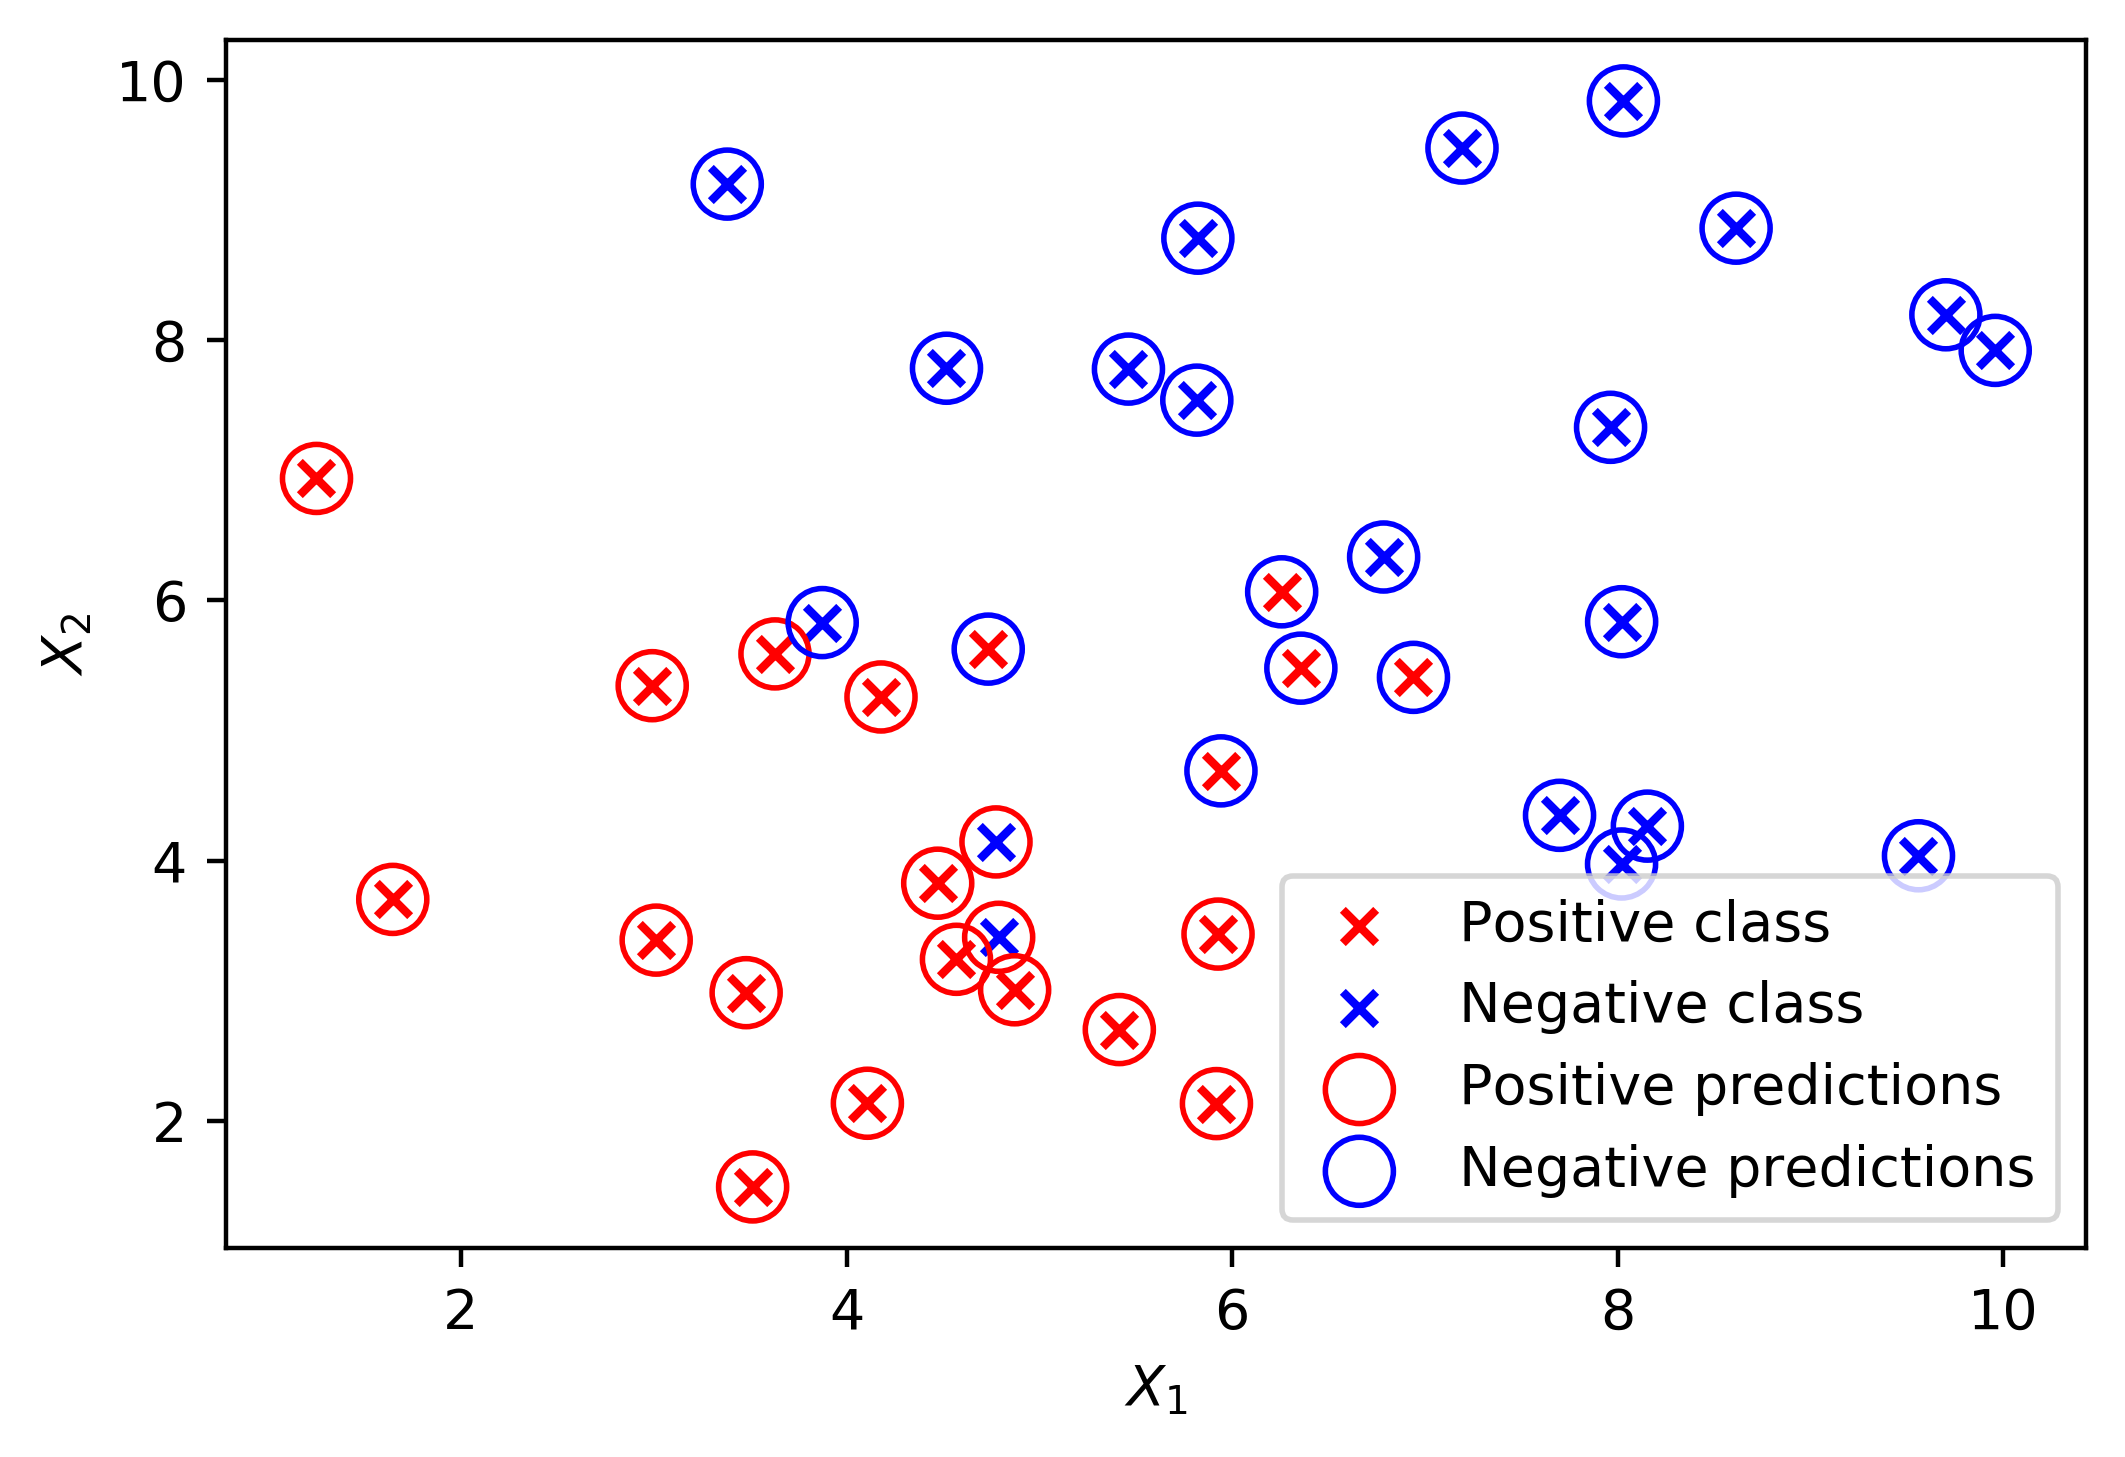

In [71]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

$\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$ is the equation for the decision boundary line, for a threshold of 0.5. Solving for "$y = mx + b$" form,

$X_2 = -\frac{\theta_1}{\theta_2}X_1 - \frac{\theta_0}{\theta_2}$

In [72]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285858 -0.253364236267732


In [73]:
example_lr.intercept_

array([2.25479161])

In [74]:
theta_0 = example_lr.intercept_

In [75]:
X_1_decision_boundary = np.array([0, 10])

In [76]:
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

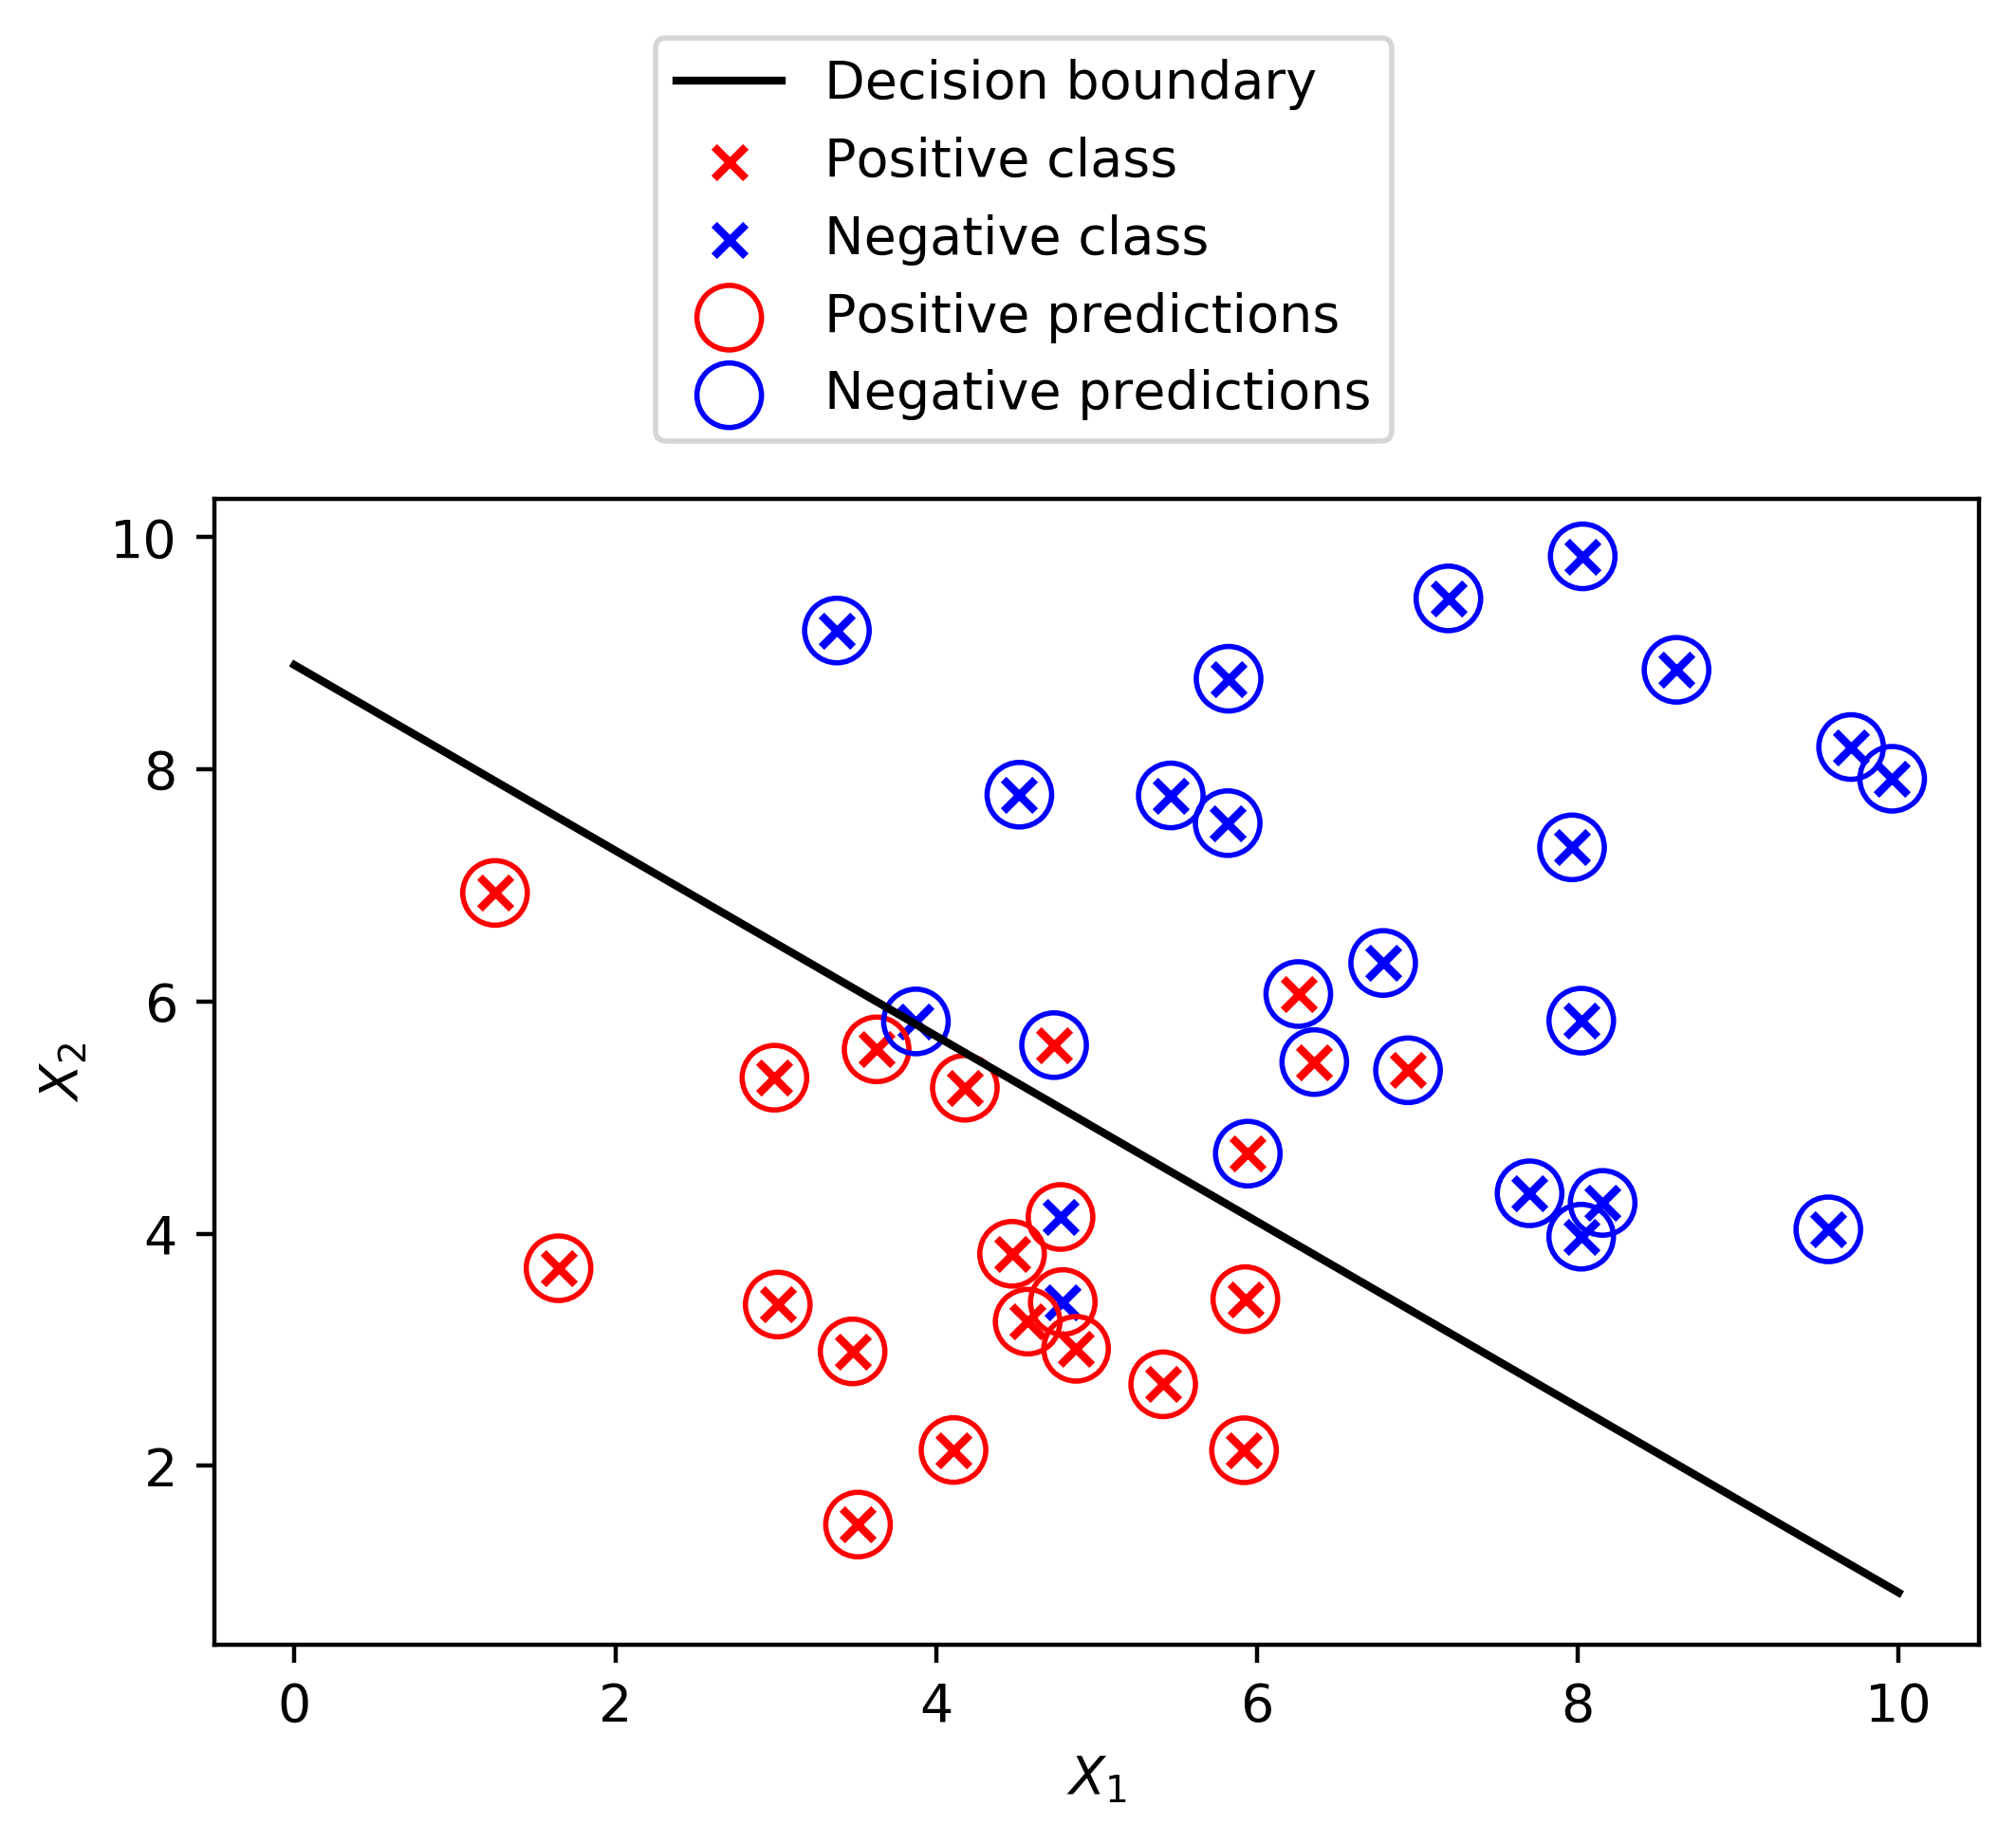

In [77]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
df[['PAY_1', 'LIMIT_BAL']].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [80]:
print(X_train.shape)
print(X_test.shape)

(21331, 2)
(5333, 2)


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr_model = LogisticRegression(solver='liblinear')

In [83]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred = lr_model.predict(X_test)

In [86]:
y_pred_proba = lr_model.predict_proba(X_test)

In [87]:
print(lr_model.coef_, lr_model.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]] [-6.57647457e-11]


In [88]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)

In [89]:
ones_and_features = np.hstack([np.ones((X_test.shape[0],1)), X_test])
ones_and_features

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [90]:
intercept_and_coefs = np.concatenate([lr_model.intercept_.reshape(1,1), lr_model.coef_], axis=1)
intercept_and_coefs

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [91]:
X_lin_comb = np.dot(intercept_and_coefs, np.transpose(ones_and_features))

In [92]:
y_pred_proba_manual = sigmoid(X_lin_comb)

In [93]:
y_pred_manual = y_pred_proba_manual >= 0.5

In [94]:
y_pred.shape

(5333,)

In [95]:
y_pred_manual.shape

(1, 5333)

In [96]:
np.array_equal(y_pred.reshape(1,-1), y_pred_manual)

True

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
y_test.shape

(5333,)

In [99]:
y_pred_proba_manual.shape

(1, 5333)

In [100]:
roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))

0.627207450280691

In [101]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.627207450280691